# Estatísticas do Jogos da plataforma Alite

  - This file is part of  program Alite.
  - Copyright © 2023  Carlo Oliveira <carlo@nce.ufrj.br>.
  - [Labase](http://labase.selfip.org) - [NCE](http://portal.nce.ufrj.br) - [UFRJ](http://www.ufrj.br).
  - SPDX-License-Identifier: ([GNU General Public License v3.0 or later](https://www.gnu.org/licenses/gpl-3.0-standalone.html)).

## Version and configurations.

 This module retrieves data and plot statistics for the [Alite - Games](https://games.alite.selfip.org).

## [23.07](https://github.com/labase/data_edu/releases)

### Added

- Review oposition deviation and transamb (6).
- Added negation, fixed minor warnings (7).

## [23.06](https://github.com/labase/data_edu/releases)

### Added

- Preliminary stats on Alite games data.
- Classe adicionada para plotar wisconsin (14).



## Recebe dados dos games de alite e converte para dataframe

In [52]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/players'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)

df_players = df
print(df)

                                     _id                name   ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')               admin  ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')               outro  ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')         Pedro Lomba  ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')              daniel  ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')            kduzinho  ano1  masculino   
..                                   ...                 ...   ...        ...   
66  ObjectId('64a6f58ab23753d1d92bcbe2')             Jessica  ano6   feminino   
67  ObjectId('64a6fadcb23753d1d92bcbe4')  Yuri da rocha rosa  ano6  masculino   
68  ObjectId('64a7896fb23753d1d92bcbe7')     William Barbosa  ano6  masculino   
69  ObjectId('64a78b02b23753d1d92bcbef')     William Barbosa  ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')     William Barbosa  ano6  masculino   

     idade                 

## Converte lista de dicionários numa lista de nomes dos jogos

In [53]:
dfg = [[g["game"] for g in t] for t in df.games]
# dfg = pd.DataFrame(dfg)
df['games_l'] = [[g["game"] for g in t] for t in df.games]
df

_id                name   ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')               admin  ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')               outro  ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')         Pedro Lomba  ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')              daniel  ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')            kduzinho  ano1  masculino   
..                                   ...                 ...   ...        ...   
66  ObjectId('64a6f58ab23753d1d92bcbe2')             Jessica  ano6   feminino   
67  ObjectId('64a6fadcb23753d1d92bcbe4')  Yuri da rocha rosa  ano6  masculino   
68  ObjectId('64a7896fb23753d1d92bcbe7')     William Barbosa  ano6  masculino   
69  ObjectId('64a78b02b23753d1d92bcbef')     William Barbosa  ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')     William Barbosa  ano6  masculino   

     idade                              time  \
0   anos10  2023-05-31 19:45:52.561244-03:00   
1    anos9  2023-05-31 19:50:01.899904-03:00   
2   anos10  2023-06-03 15:01:44.637563-03:00   
3   anos10  2023-06-03 15:27:05.449207-03:00   
4    anos1  2023-06-03 15:30:35.506478-03:00   
..     ...                               ...   
66   anos7  2023-07-06 14:10:34.810517-03:00   
67   anos8  2023-07-06 14:33:16.102952-03:00   
68   anos9  2023-07-07 00:41:35.462214-03:00   
69   anos9  2023-07-07 00:48:18.261089-03:00   
70   anos9  2023-07-07 00:51:33.056750-03:00   

                                                games  \
0   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
1   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
2   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
3   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
4   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
..                                                ...   
66  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
67  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
68  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
69  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
70  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   

                                              games_l  
0                                        [wcst, game]  
1                            [wcst, wcst, game, game]  
2                                              [game]  
3                                              [wcst]  
4                                              [game]  
..                                                ...  
66                                             [game]  
67                                       [wcst, wcst]  
68         [game, game, game, game, game, game, game]  
69  [game, game, wcst, wcst, wcst, wcst, wcst, wcs...  
70                                       [wcst, game]  

[71 rows x 8 columns]

## Contagem dentro das listas dos jogos

In [54]:
df['eica'] = [sum([1 for g in t  if "game" in g]) for t in df.games_l.tolist()]
df['wcst'] = [sum([1 for g in t  if "wcst" in g]) for t in df.games_l.tolist()]
df

_id                name   ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')               admin  ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')               outro  ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')         Pedro Lomba  ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')              daniel  ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')            kduzinho  ano1  masculino   
..                                   ...                 ...   ...        ...   
66  ObjectId('64a6f58ab23753d1d92bcbe2')             Jessica  ano6   feminino   
67  ObjectId('64a6fadcb23753d1d92bcbe4')  Yuri da rocha rosa  ano6  masculino   
68  ObjectId('64a7896fb23753d1d92bcbe7')     William Barbosa  ano6  masculino   
69  ObjectId('64a78b02b23753d1d92bcbef')     William Barbosa  ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')     William Barbosa  ano6  masculino   

     idade                              time  \
0   anos10  2023-05-31 19:45:52.561244-03:00   
1    anos9  2023-05-31 19:50:01.899904-03:00   
2   anos10  2023-06-03 15:01:44.637563-03:00   
3   anos10  2023-06-03 15:27:05.449207-03:00   
4    anos1  2023-06-03 15:30:35.506478-03:00   
..     ...                               ...   
66   anos7  2023-07-06 14:10:34.810517-03:00   
67   anos8  2023-07-06 14:33:16.102952-03:00   
68   anos9  2023-07-07 00:41:35.462214-03:00   
69   anos9  2023-07-07 00:48:18.261089-03:00   
70   anos9  2023-07-07 00:51:33.056750-03:00   

                                                games  \
0   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
1   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
2   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
3   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
4   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
..                                                ...   
66  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
67  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
68  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
69  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
70  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   

                                              games_l  eica  wcst  
0                                        [wcst, game]     1     1  
1                            [wcst, wcst, game, game]     2     2  
2                                              [game]     1     0  
3                                              [wcst]     0     1  
4                                              [game]     1     0  
..                                                ...   ...   ...  
66                                             [game]     1     0  
67                                       [wcst, wcst]     0     2  
68         [game, game, game, game, game, game, game]     7     0  
69  [game, game, wcst, wcst, wcst, wcst, wcst, wcs...     2     9  
70                                       [wcst, game]     1     1  

[71 rows x 10 columns]

## Plotagem dos Jogos jogados por Jogador

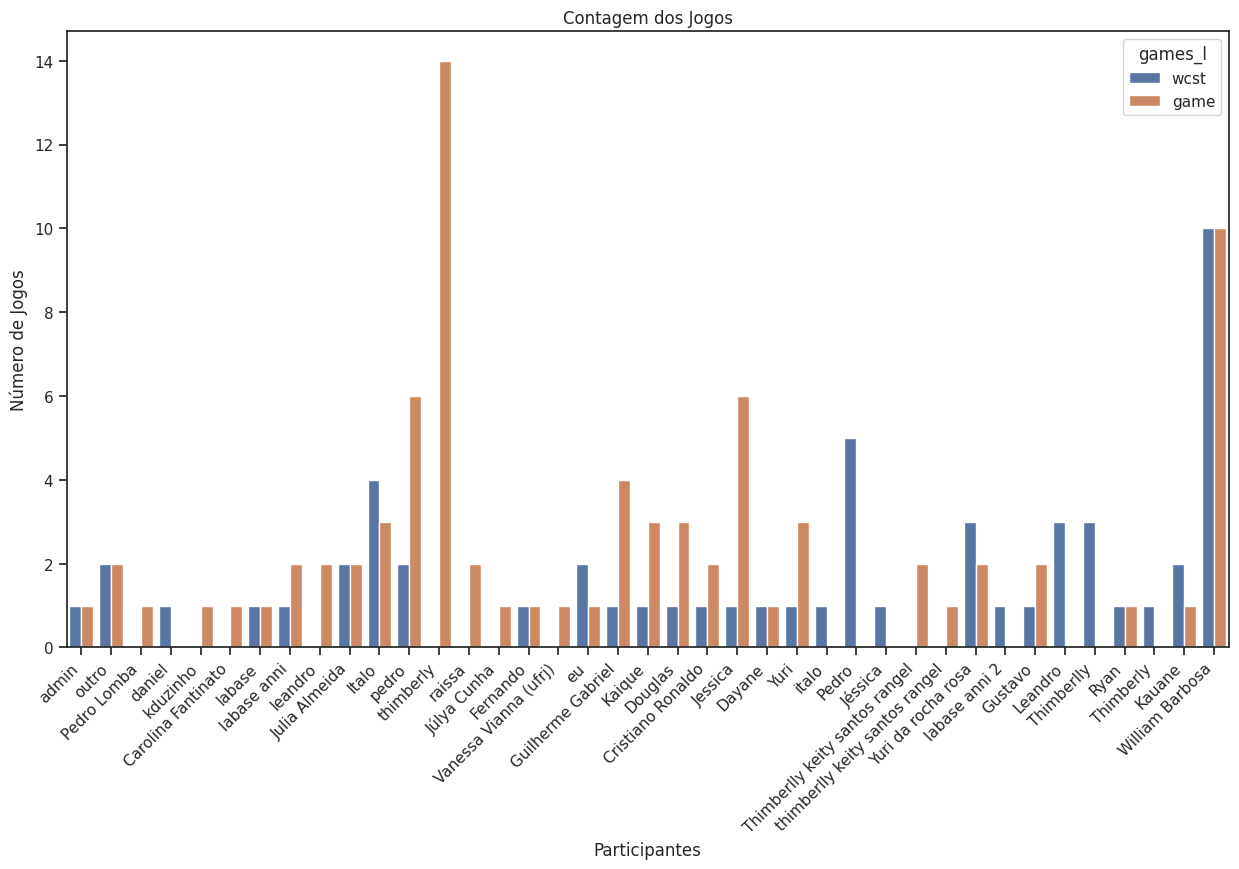

In [55]:
import seaborn as sns
from matplotlib import pyplot as plt
dfx = df.explode('games_l')
# dfm = pd.melt(df, 'games_l')
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfx, x="name", hue="games_l")
_ = chart.set(title='Contagem dos Jogos', ylabel='Número de Jogos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


In [56]:
df

_id                name   ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')               admin  ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')               outro  ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')         Pedro Lomba  ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')              daniel  ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')            kduzinho  ano1  masculino   
..                                   ...                 ...   ...        ...   
66  ObjectId('64a6f58ab23753d1d92bcbe2')             Jessica  ano6   feminino   
67  ObjectId('64a6fadcb23753d1d92bcbe4')  Yuri da rocha rosa  ano6  masculino   
68  ObjectId('64a7896fb23753d1d92bcbe7')     William Barbosa  ano6  masculino   
69  ObjectId('64a78b02b23753d1d92bcbef')     William Barbosa  ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')     William Barbosa  ano6  masculino   

     idade                              time  \
0   anos10  2023-05-31 19:45:52.561244-03:00   
1    anos9  2023-05-31 19:50:01.899904-03:00   
2   anos10  2023-06-03 15:01:44.637563-03:00   
3   anos10  2023-06-03 15:27:05.449207-03:00   
4    anos1  2023-06-03 15:30:35.506478-03:00   
..     ...                               ...   
66   anos7  2023-07-06 14:10:34.810517-03:00   
67   anos8  2023-07-06 14:33:16.102952-03:00   
68   anos9  2023-07-07 00:41:35.462214-03:00   
69   anos9  2023-07-07 00:48:18.261089-03:00   
70   anos9  2023-07-07 00:51:33.056750-03:00   

                                                games  \
0   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
1   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
2   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
3   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
4   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
..                                                ...   
66  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
67  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
68  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
69  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
70  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   

                                              games_l  eica  wcst  
0                                        [wcst, game]     1     1  
1                            [wcst, wcst, game, game]     2     2  
2                                              [game]     1     0  
3                                              [wcst]     0     1  
4                                              [game]     1     0  
..                                                ...   ...   ...  
66                                             [game]     1     0  
67                                       [wcst, wcst]     0     2  
68         [game, game, game, game, game, game, game]     7     0  
69  [game, game, wcst, wcst, wcst, wcst, wcst, wcs...     2     9  
70                                       [wcst, game]     1     1  

[71 rows x 10 columns]

## Converte ObjectId para Identificador

In [57]:
import re

# noinspection PyProtectedMember
matches = [re.findall(r"'(.+?)'",text)[0] for text in df._id.to_list()]
df["oid"] = matches
dfo = df
df.oid[1]

'6477cf19f626d3cb95e08c92'

## Testa a recuperação dos dados de um jogador

In [58]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/player?oid=6477cf19f626d3cb95e08c92'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)
print(df)

                                    _id   name   ano      sexo  idade  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   

                               time  \
0  2023-05-31 19:50:01.899904-03:00   
1  2023-05-31 19:50:01.899904-03:00   
2  2023-05-31 19:50:01.899904-03:00   
3  2023-05-31 19:50:01.899904-03:00   

                                               games  
0  {'game': 'wcst', 'goal': 0, 'trial': 0, 'score...  
1  {'game': 'wcst', 'goal': 0, 'trial': 1, 'score...  
2  {'game': 'game', 'goal': 0, 'trial': 0, 'score...  
3  {'game': 'game', 'goal': 0, 'trial': 1, 'score...  


## Limpeza dos dados dos games

In [59]:
df0 = pd.DataFrame(df.games.to_list())
df0
# df.games

game  goal  trial                                scorer
0  wcst     0      0  ObjectId('6477cf1df626d3cb95e08c93')
1  wcst     0      1  ObjectId('6477cf29f626d3cb95e08c94')
2  game     0      0  ObjectId('6477cf31f626d3cb95e08c95')
3  game     0      1  ObjectId('6477cf53f626d3cb95e08c96')

## Obtém o identificador de pontuação em formato texto

In [60]:
df0['score'] = [re.findall(r"'(.+?)'",text)[0] for text in df0.scorer.to_list()]
df0

game  goal  trial                                scorer  \
0  wcst     0      0  ObjectId('6477cf1df626d3cb95e08c93')   
1  wcst     0      1  ObjectId('6477cf29f626d3cb95e08c94')   
2  game     0      0  ObjectId('6477cf31f626d3cb95e08c95')   
3  game     0      1  ObjectId('6477cf53f626d3cb95e08c96')   

                      score  
0  6477cf1df626d3cb95e08c93  
1  6477cf29f626d3cb95e08c94  
2  6477cf31f626d3cb95e08c95  
3  6477cf53f626d3cb95e08c96

## Recupera os dados de jogadas de um jogador

In [61]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/games?oid=6477cf19f626d3cb95e08c92'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    dfgp = pd.DataFrame(data)
print(dfgp)

                                    _id   name  game  goal  trial  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   

                                              scorer  
0  [{'carta': 0, 'casa': 'no no no', 'move': 'no ...  
1  [{'carta': 0, 'casa': 'no no no', 'move': 'no ...  
2  [{'carta': '__I_N_I_T__', 'casa': '0_0', 'move...  
3  [{'carta': '__I_N_I_T__', 'casa': '0_0', 'move...  


## Expande a lista interna de games e transforma em colunas

In [64]:
dfx = dfgp.explode('scorer')
dfxx = dfx.drop(columns=["scorer"], inplace=False).join(
    dfx.apply(lambda x: pd.Series(x["scorer"].values(), index=x["scorer"].keys()), axis=1))
dfxx

_id   name  game  goal  trial  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   

           carta                   casa                     move     ponto  \
0              0               no no no                 no no no       000   
0              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
0              2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
0              0               no no no                 no no no       000   
0              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
0              2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
0              0               no no no                 no no no       000   
0              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
0              2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
1              0               no no no                 no no no       000   
1              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
1              2   Três Cruzes Amarelas  Quatro Cruzes Vermelha

In [65]:
dfxl = pd.DataFrame(dfx.scorer.values.tolist())
dfx = dfx.drop(columns=["scorer"], inplace=False).reset_index()
dfxj = dfx.join(dfxl)
dfxj

index                                   _id   name  game  goal  trial  \
0       0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
1       0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
2       0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
3       1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
4       1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
5       1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
6       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
7       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
8       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
9       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
10      3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
11      3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
12      3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   

            carta                   casa                     move     ponto  \
0               0               no no no                 no no no       000   
1               1   Duas Estrelas Verdes       Um Triângulo Verde       100   
2               2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
3               0               no no no                 no no no       000   
4               1   Duas Estrelas Verdes       Um Triângulo Verde       100   
5               2   Três Cruzes Amarelas  Quatro Cruzes Vermelhas       000   
6     __I_N_I_T__                    0_0                       ok    _INIT_   
7   __A_T_I_V_A__                    0_0                       ok  _LINGUA_   
8        34_10_14                    0_0                       ok    _FALA_   
9        30_46_31                    0_0                       ok    _FALA_   
10    __I_N_I_T__                    0_0                       ok    _INIT_   
11  __A_T_I_V_A__                    0_0                       ok   _MUNDO_   
12             13                596_448                       ok   _Mundo_   

   valor                        time  
0   0000  2023-05-31 19:50:05.437000  
1   1000  2023-05-31 19:50:08.186000  
2   1000  2023-05-31 19:50:10.643000  
3   0000  2023-05-31 19:50:17.902000  
4   1000  2023-05-31 19:50:19.704000  
5   0100  2023-05-31 19:50:21.429000  
6   True  2023-05-31 19:50:26.703999  
7   True  2023-05-31 19:50:30.453999  
8   True  2023-05-31 19:50:35.878000  
9   True  2023-05-31 19:50:52.269999  
10  True  2023-05-31 19:50:59.826999  
11  True  2023-05-31 19:51:05.345999  
12  True  2023-05-31 19:51:11.971999

# Recuperação e plotagem das jogadas

## Pedido dos dados ao servidor e converte num arcabouço de dados

In [67]:
import urllib.request, json
import pandas as pd
furl = 'https://games.alite.selfip.org/score/games?oid={}'
dfa = pd.DataFrame()
dfl = []

def retrieve_games(player):
    global dfl
    with urllib.request.urlopen(furl.format(player)) as urlp:
        dfl.extend(json.loads(urlp.read().decode()))
def process_df():
    dfg_ = pd.DataFrame(dfl)

    dfx_ = dfg_.explode('scorer')
    dfxl_ = [d for d in dfx_.scorer.values.tolist() if isinstance(d, dict)]
    dfxl_ = pd.DataFrame(dfxl_)
    dfx_ = dfx_.drop(columns=["scorer"], inplace=False).reset_index()
    return dfx_.join(dfxl_)
games = [retrieve_games(oid) for oid in dfo.oid.to_list()]

## Gera o arcabouço de dados das jogadas

In [72]:
dfa_ = process_df()

dfa_

index                                   _id             name  game  \
0          0  ObjectId('6477ce20f626d3cb95e08c8f')            admin  wcst   
1          0  ObjectId('6477ce20f626d3cb95e08c8f')            admin  wcst   
2          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
3          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
4          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
...      ...                                   ...              ...   ...   
10906    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10907    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10908    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10909    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10910    138  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  game   

       goal  trial          carta                  casa                move  \
0         0      0              0              no no no            no no no   
1         0      0              1  Duas Estrelas Verdes  Um Triângulo Verde   
2         0      0    __I_N_I_T__                   0_0                  ok   
3         0      0  __A_T_I_V_A__                   0_0                  ok   
4         0      0       minitens               400_520                  ok   
...     ...    ...            ...                   ...                 ...   
10906     0      0            NaN                   NaN                 NaN   
10907     0      0            NaN                   NaN                 NaN   
10908     0      0            NaN                   NaN                 NaN   
10909     0      0            NaN                   NaN                 NaN   
10910     0      0            NaN                   NaN                 NaN   

          ponto     valor                        time  
0           000      0000  2023-05-31 19:46:43.649000  
1           100      1000  2023-05-31 19:46:49.652000  
2        _INIT_      True  2023-05-31 19:49:01.943000  
3      _CHAVES_      True  2023-05-31 19:49:08.206000  
4        _ABAS_  minitens  2023-05-31 19:49:11.043999  
...         ...       ...                         ...  
10906       NaN       NaN                         NaN  
10907       NaN       NaN                         NaN  
10908       NaN       NaN                         NaN  
10909       NaN       NaN                         NaN  
10910       NaN       NaN                         NaN  

[10911 rows x 12 columns]

## Separa os dados do Wisconsin

In [74]:
dfwc = dfa_.loc[dfa_['game'] == 'wcst']
dfwc

index                                   _id             name  game  \
0          0  ObjectId('6477ce20f626d3cb95e08c8f')            admin  wcst   
1          0  ObjectId('6477ce20f626d3cb95e08c8f')            admin  wcst   
10         2  ObjectId('6477cf19f626d3cb95e08c92')            outro  wcst   
11         2  ObjectId('6477cf19f626d3cb95e08c92')            outro  wcst   
12         2  ObjectId('6477cf19f626d3cb95e08c92')            outro  wcst   
...      ...                                   ...              ...   ...   
10905    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10906    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10907    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10908    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   
10909    137  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  wcst   

       goal  trial carta                   casa                     move  \
0         0      0     0               no no no                 no no no   
1         0      0     1   Duas Estrelas Verdes       Um Triângulo Verde   
10        0      0     0               no no no                 no no no   
11        0      0     1   Duas Estrelas Verdes       Um Triângulo Verde   
12        0      0     2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas   
...     ...    ...   ...                    ...                      ...   
10905     0      0   NaN                    NaN                      NaN   
10906     0      0   NaN                    NaN                      NaN   
10907     0      0   NaN                    NaN                      NaN   
10908     0      0   NaN                    NaN                      NaN   
10909     0      0   NaN                    NaN                      NaN   

      ponto valor                        time  
0       000  0000  2023-05-31 19:46:43.649000  
1       100  1000  2023-05-31 19:46:49.652000  
10      000  0000  2023-05-31 19:50:05.437000  
11      100  1000  2023-05-31 19:50:08.186000  
12      200  1000  2023-05-31 19:50:10.643000  
...     ...   ...                         ...  
10905   NaN   NaN                         NaN  
10906   NaN   NaN                         NaN  
10907   NaN   NaN                         NaN  
10908   NaN   NaN                         NaN  
10909   NaN   NaN                         NaN  

[3334 rows x 12 columns]

## Gráfico de contagem de pontos no Wisc

### Classe para concentrar as operações de arcabouço

In [76]:
from pandas import DataFrame
from collections import namedtuple
from dataclasses import dataclass

@dataclass
class Plot:
    kind = "value plot factor violin hist heat".split()
    icon = [(6, 5), (6, 5), (3, 2), (6, 0), (2, 2), (5, 4)]
    value = dict(col='valor', title='Contagem dos Valores Wisc', ylabel='Contagem de Valores',
                 xlabel="Participantes", sub_title="Counting Plot de valores do teste Wisconsin")
    plot = dict(col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos',
                xlabel="Participantes", sub_title="Counting Plot de pontos do teste Wisconsin")
    factor = dict(col='ponto', title='Factor Plot das medidas do Wisc', ylabel='frequência das incidência',
                  xlabel="incidência das medidas", sub_title="Factor Plot do teste Wisconsin")
    violin = dict(col='ponto', title='Violin Plot das medidas do Wisc', ylabel='frequência das incidência',
                  xlabel="incidência das medidas", sub_title="Violin Plot do teste Wisconsin")
    hist = dict(col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência',
                xlabel="incidência das medidas", sub_title="Histogram Plot do teste Wisconsin")
    heat = dict(col='ponto', title='Correlação das medidas do Wisc', ylabel='listagem das incidência',
                xlabel="listagem das medidas", sub_title="Heatmap Plot dos fatores no teste Wisconsin")
    plotting = dict(value=value, plot=plot, factor=factor, violin=violin, hist=hist, heat=heat)

class WiscPlot:
    Cfplot = namedtuple("Cfplot", "col title ylabel xlabel")
    Pnt = namedtuple("Pnt", "ok no td")
    Val = namedtuple("Val", "cc cf cn ct")
    def __init__(self, game_url='https://games.alite.selfip.org/score/games?oid={}'):
        self.game_url = game_url
        self.df: DataFrame = DataFrame()
        self.game_data = []
        self.count = 0

    def retrieve_games(self, player):
        """ Retrieve from remote source data for a given player

        :param player: Given player id; identification
        :return: None
        """
        with urllib.request.urlopen(self.game_url.format(player)) as urlp:
            self.game_data.extend(json.loads(urlp.read().decode()))

    def process_df(self):
        """ Shapes current dataframe to filter wisc and replace the column scorer

        :return:
        """
        dfg_ = DataFrame(self.game_data)
        dfg_ = dfg_.loc[dfg_['game'] == 'wcst']
        dfg_["name"] = dfg_.name.apply(lambda x: f"{n[0]} {n[1][:2]}." if len(n := x.split()) > 1 else x)

        dfx_ = dfg_.explode('scorer')
        score_list = [val for val in dfx_.scorer.values.tolist() if type(val) == dict]
        dfl_ = DataFrame(score_list)
        dfx_ = dfx_.drop(columns=["scorer"], inplace=False).reset_index()
        return dfx_.join(dfl_)

    def get_all_games(self, player_oids):
        """ Get all games from a given player.

        :param player_oids: Given player id
        :return: None (assign to current df attribute)
        """
        _ = [self.retrieve_games(oid) for oid in player_oids]
        # print(self.game_data)
        self.df = self.process_df()

    def retrieve_oid_from_person_df(self, person_df):
        """ Trim id vale from extra surroundings.

        :param person_df: Given player dataframe
        :return: self (this object)
        """
        import re
        # noinspection PyProtectedMember
        oid_list = [re.findall(r"'(.+?)'", text)[0] for text in person_df._id.to_list()]
        self.get_all_games(oid_list)
        return self

    def refine_point_value_info(self):
        """ Extract some cognitive relevant properties from existing data,

        :return: transformed dataframe with new columns
        """

        def counter(a, b):
            """ Counts repetition of a figure.

            :param a: current figure of the series
            :param b: next figure of the series
            :return: count if prevails or zero if not
            """
            a, b = int(a), int(b)
            self.count += (1 if a else 0)
            count, self.count = self.count if not b else 0, 0 if not b else self.count
            return count
        def alter(a, b):
            a, b = int(a), int(b)
            no_alter = (a == b) or (b==0) or (a==0)
            self.count += (1 if a!=b else 0)
            count, self.count = self.count if no_alter else 0, 0 if no_alter else self.count
            return count

        def nobother(cc, cf, cn, ct, ng=False):
            non =  [int(cc), int(cf), int(cn)]
            do = non.pop(int(ct)%3) < 1
            return int(not any(non) if ng else all(non)) if do else 0

        def noner(cc, cf, cn, ct):
            non =  [int(cc), int(cf), int(cn)]
            do = non.pop(int(ct)%3) < 1
            return (non[0] + 2* non[1]) if do else 0

        def bother(cc, cf, cn, ct, e=True):
            cc, cf, cn, ct = int(cc), int(cf), int(cn), int(ct) % 3
            all_k = [cc, cf, cn]
            if ct > 2 or ct < 0:
                raise ValueError(ct)
            target = all_k.pop(ct)
            return target * sum(all_k) if e else int(all(all_k))

        point_list = [text if type(text) == str else "000" for text in self.df.ponto.to_list()]
        valor_list = [text if type(text) == str else "0000" for text in self.df.valor.to_list()]
        point_list = [self.Pnt(text[:-2], *list(text[-2:])) for text in point_list]
        new_list = point_list[1:] + [self.Pnt(0, 0, 0)]
        val_list0 = [self.Val(*list(text)) for text in valor_list]
        non_list = [noner(*list(val)) for val in valor_list]
        nob_list = [nobother(*list(val)) for val in valor_list]
        neg_list = [nobother(*list(val), ng=True) for val in valor_list]
        conservation = [counter(a.ok, b.ok) for a, b in zip(point_list, new_list)]
        perseveration = [counter(a.no, b.no) for a, b in zip(point_list, new_list)]
        deviation = [alter(a, b) for a, b in zip(non_list, non_list[1:] + [0])]
        oposition = [counter(a, b) for a, b in zip(nob_list, nob_list[1:] + [0])]
        negation = [counter(a, b) for a, b in zip(neg_list, neg_list[1:] + [0])]
        ambiguation = [bother(cc, cf, cn, ct) for cc, cf, cn, ct in val_list0]
        transamb = [bother(cc, cf, cn, ct, False) for cc, cf, cn, ct in val_list0]
        zipped = list(zip(conservation, perseveration, oposition, negation, deviation, ambiguation, transamb))
        columns = 'conservation perseveration oposition negation deviation ambiguation transamb'.split()
        df__ = DataFrame(zipped, columns=columns)
        _df = self.df.drop(columns='game goal trial carta casa move time ponto valor'.split(),
                           inplace=False).reset_index()
        _df = _df.join(df__).drop(columns='level_0 index _id'.split(), inplace=False)
        # self.df = _df
        return _df

    def plot_template(self, cfg: Cfplot, runner, x_lim=None, y_lim=None, tick=False, tl= False, df=None):
        """ Template method to embrace a given method.

        :param tick: Add slant labels to x-axis.
        :param tl: Add slant labels with get labels to x-axis.
        :param cfg: Plotting configuration
        :param runner: Given method to be templated.
        :param df: Dataframe source for plotting.
        :param x_lim: Limits for x-axis.
        :param y_lim: Limits for y-axis.
        :return: Plotting context.
        """
        from matplotlib import pyplot as plt_
        _ = plt_.figure(figsize=(20, 8))
        ax_ = f.add_subplot(1, 1, 1)

        if df is None:
            df_ = self.refine_point_value_info()
            df_ = pd.melt(df_, id_vars="name", var_name="measure", value_name="incidence")
        else:
            df_ = df
        chart_ = runner(df_, ax_)
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        chart_.set_xticklabels(chart_.get_xticklabels(), rotation=45, horizontalalignment='right') if tl else None
        _ = chart_.set_xticklabels(rotation=45, horizontalalignment='right') if tick else None
        chart_.set(xlim=x_lim) if x_lim else None
        chart_.set(ylim=y_lim) if y_lim else None
        # chart_.set_xlim(left=x_lim[0], right=x_lim[1]) if x_lim else None
        return plt_

    def plot(self, cfg: Cfplot):
        """ Counting bar plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.countplot(data=df_, x="name", hue=cfg.col), df=self.df,
                                  tl=True)

    def factorplot(self, cfg: Cfplot):
        """ Factor bar plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.catplot(
            x='name', y='incidence', hue='measure', data=df_, kind='bar', height=8, aspect=2.5),
                                  tick=True, y_lim=(0, 1))

    def violinplot(self, cfg: Cfplot):
        """ Violin gaussian plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.violinplot(
            x='name', y='incidence', hue='measure', inner="quart", data=df_), y_lim=(-1, 2), tl=True)

    def histplot(self, cfg: Cfplot):
        """ Histogram bar plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.histplot(
            data=df_, stat="count", multiple="stack",
            x="incidence", kde=False,
            palette="pastel", hue="measure",
            element="bars", legend=True, ax=a),
                                  x_lim=(9, None), y_lim=(0, 8))

    def heatmap(self, cfg: Cfplot):
        """ Correlation map for cognition profiles

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        from matplotlib import pyplot as plt_
        plt_.figure(figsize=(15, 8))
        df_ = self.refine_point_value_info()
        df_ = df_.drop(columns=['name'], inplace=False)
        # Compute the correlation matrix
        corr = df_.corr()
        # Generate a mask for the upper triangle
        mask = np.triu(np.ones_like(corr, dtype=bool))
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # Draw the heatmap with the mask and correct aspect ratio
        chart_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                             square=True, linewidths=.5, cbar_kws={"shrink": .5})
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        return plt_

    def run_plotting(self, kind, data_frame):
        """ Plotting service selector

        :param kind: Selection key
        :param data_frame: Data to be plotted.
        :return: Plotting context
        """
        plotters = dict(value=self.plot, plot=self.plot, factor=self.factorplot,
                        violin=self.violinplot, hist=self.histplot, heat=self.heatmap)
        # from dash import Plotting as Plot
        configurations = dict(Plot.plotting)
        configurations[kind].pop("sub_title") if "sub_title" in configurations[kind] else None
        self.retrieve_oid_from_person_df(data_frame)
        return plotters[kind](WiscPlot.Cfplot(**configurations[kind]))

conf0 = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
conf = WiscPlot.Cfplot(
     col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência', xlabel="incidência das medidas")
out = WiscPlot().retrieve_oid_from_person_df(df_players).histplot(conf)


<Figure size 2000x800 with 0 Axes>

## KDE Plot

/tmp/ipykernel_223653/3338436002.py:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_223653/3338436002.py:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_223653/3338436002.py:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


(-1.0, 2.5)

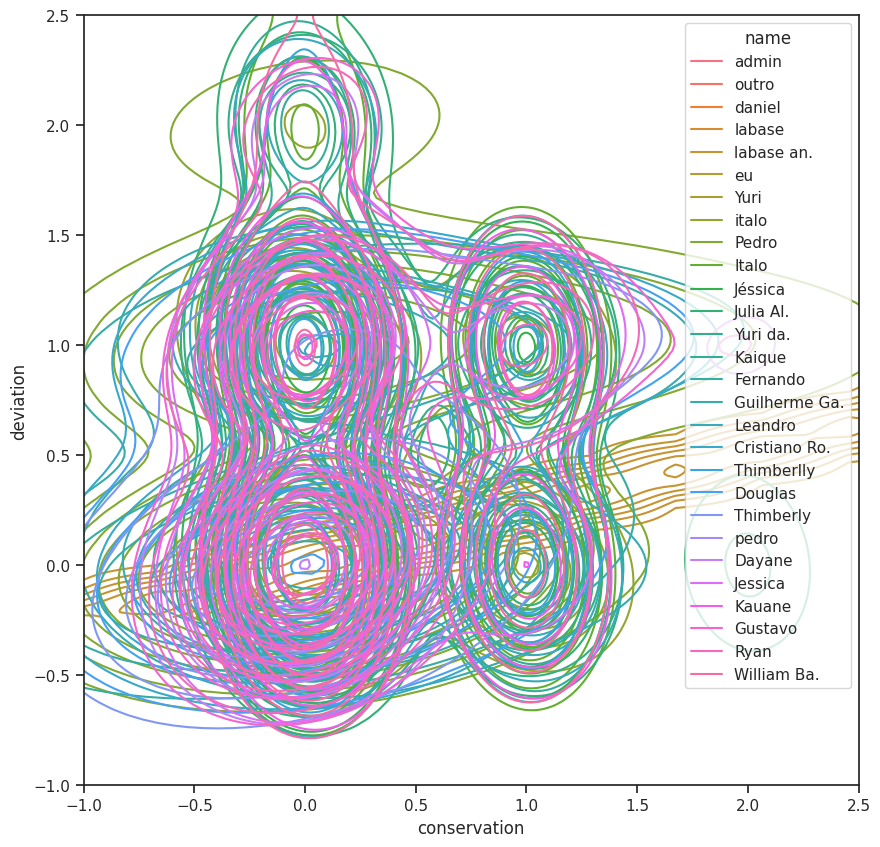

In [77]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(
    data=WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info(),
    x="conservation",
    y="deviation",
    hue="name",
    thresh=.1,
)
ax.set_xlim((-1,2.5))  #
ax.set_ylim((-1,2.5))

## Scatter plot negation x perseveration

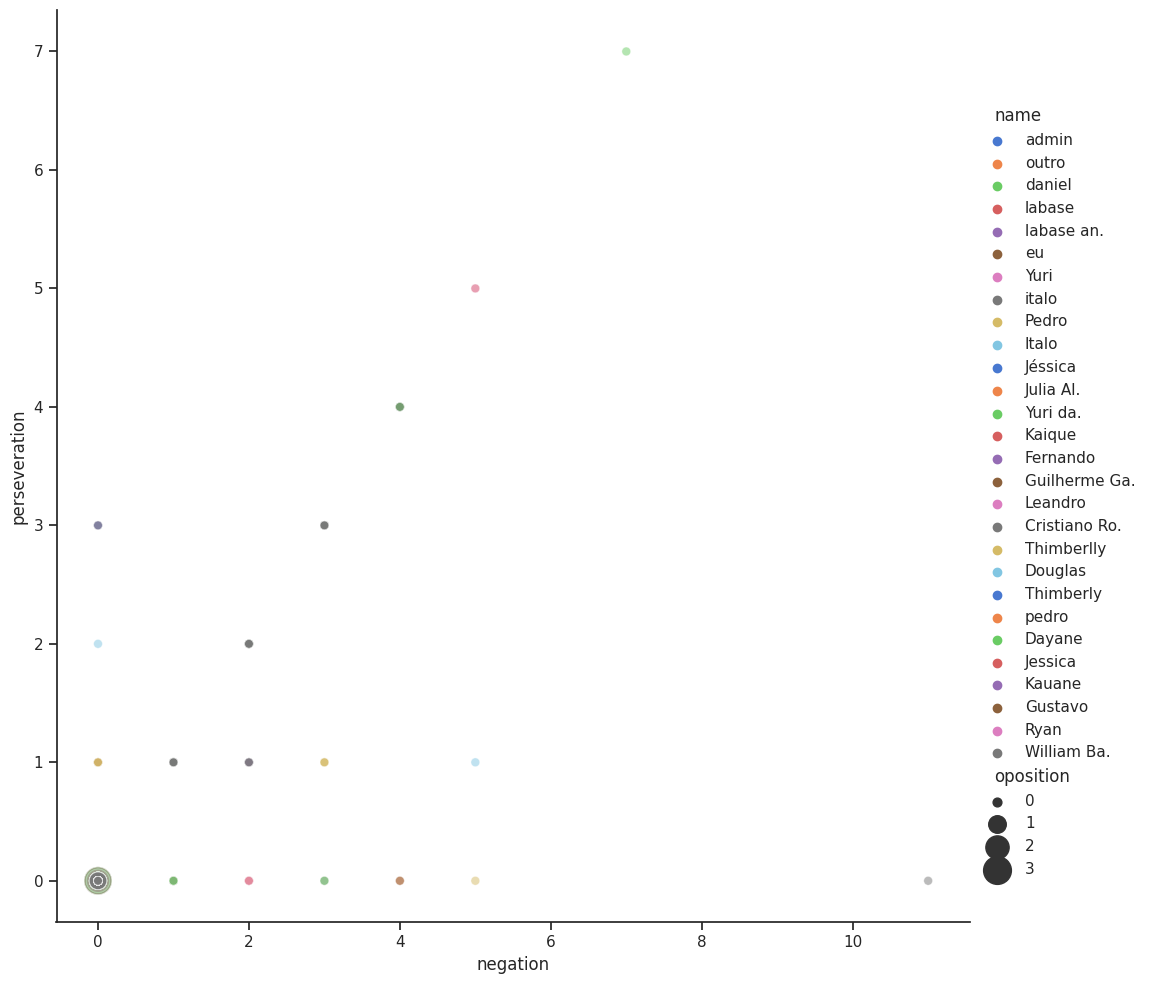

In [80]:
sns.relplot(hue="name", x="negation", y="perseveration", size="oposition",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info())


## Joint Plot Conservation x Ambiguation

/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


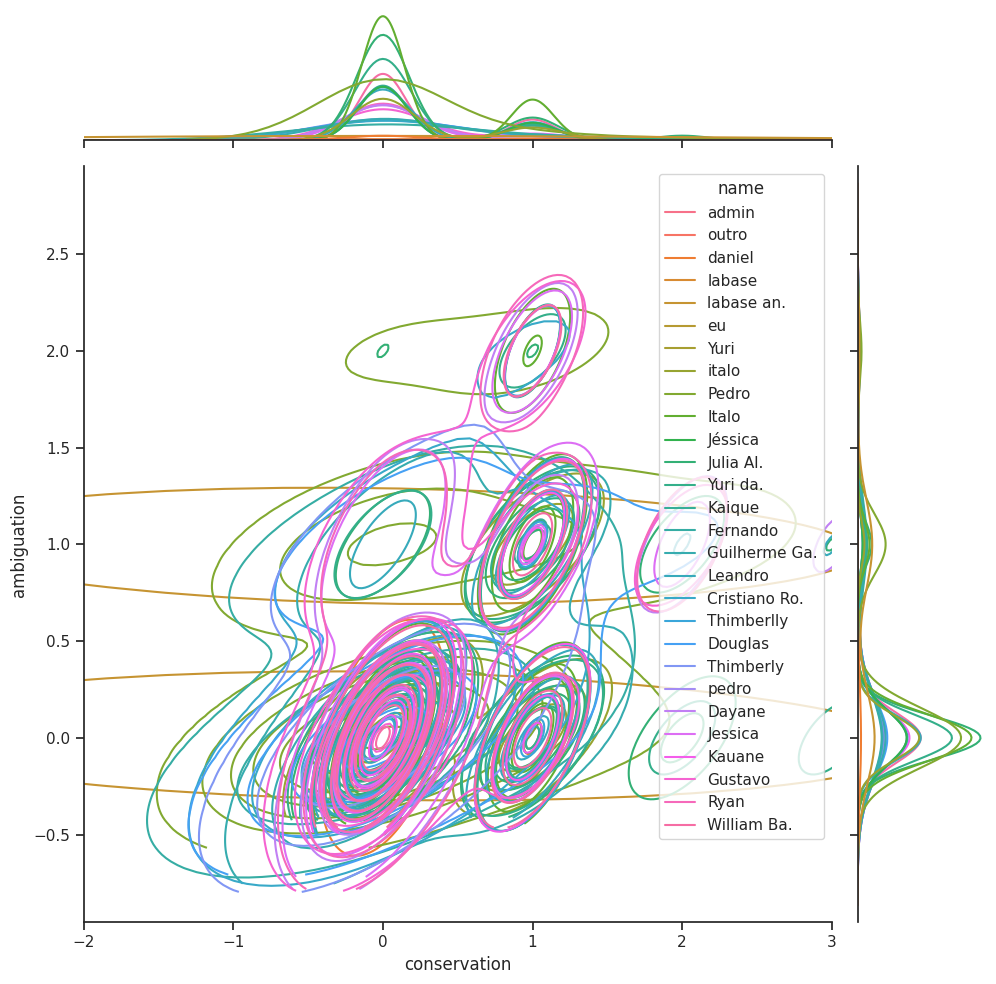

In [81]:
_ = sns.jointplot(
    data= WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info()
,
    x="conservation", y="ambiguation", hue="name", height=10, xlim = (-2,3),
    kind="kde",
)
# g.set(xlim=(-8,8))

## Joint negation perseveration

/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


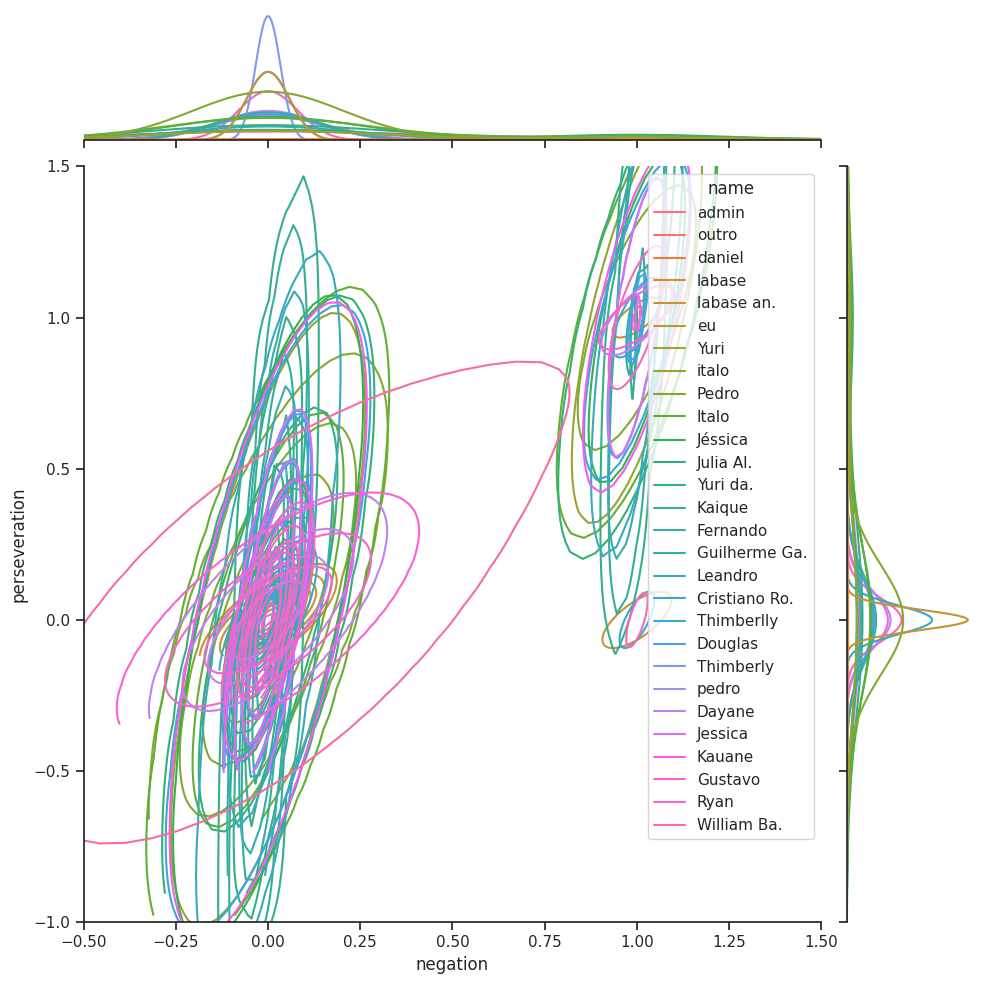

In [82]:
_ = sns.jointplot(
    data= WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info()
,
    x="negation", y="perseveration", hue="name", height=10, ylim = (-1,1.5), xlim = (-0.5,1.5),
    kind="kde",
)


## Joint oposition deviation

/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


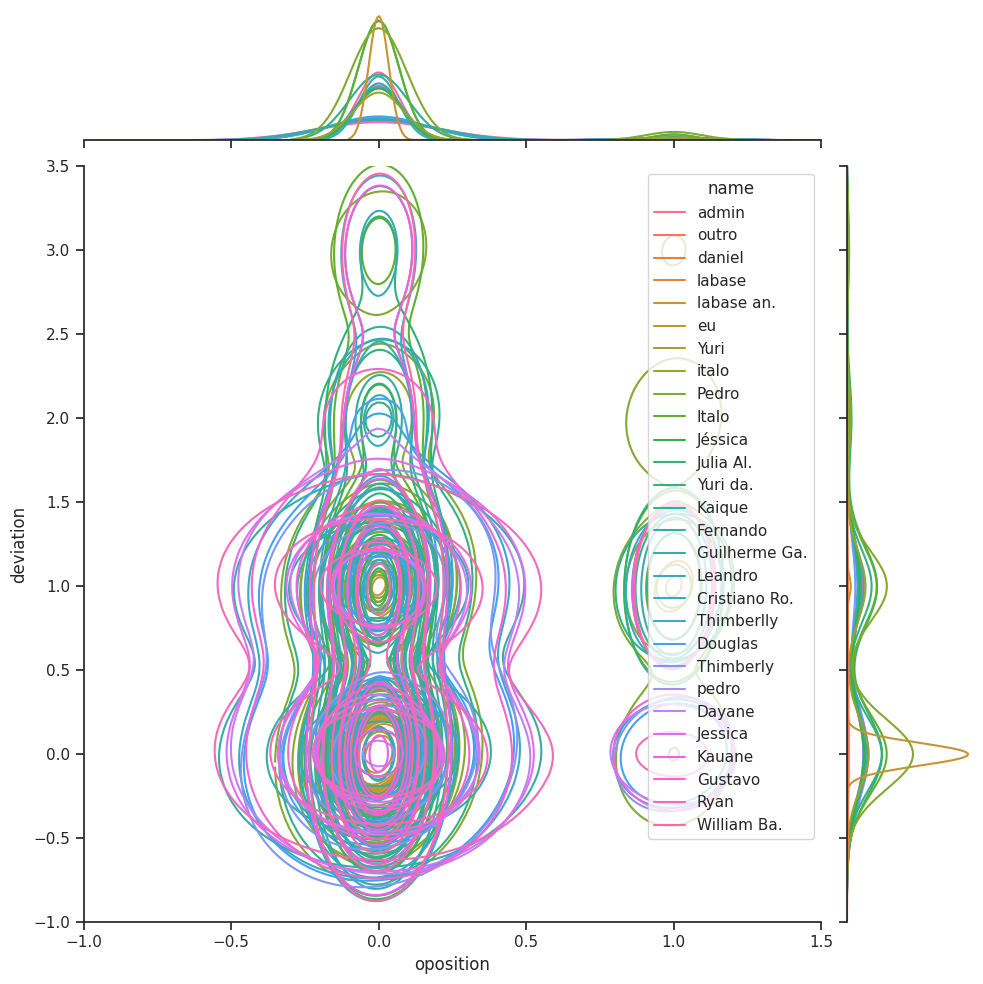

In [83]:
_ = sns.jointplot(
    data= WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info()
,
    x="oposition", y="deviation", hue="name", height=10, ylim = (-1,3.5), xlim = (-1,1.5),
    kind="kde",
)


## Pair Plot

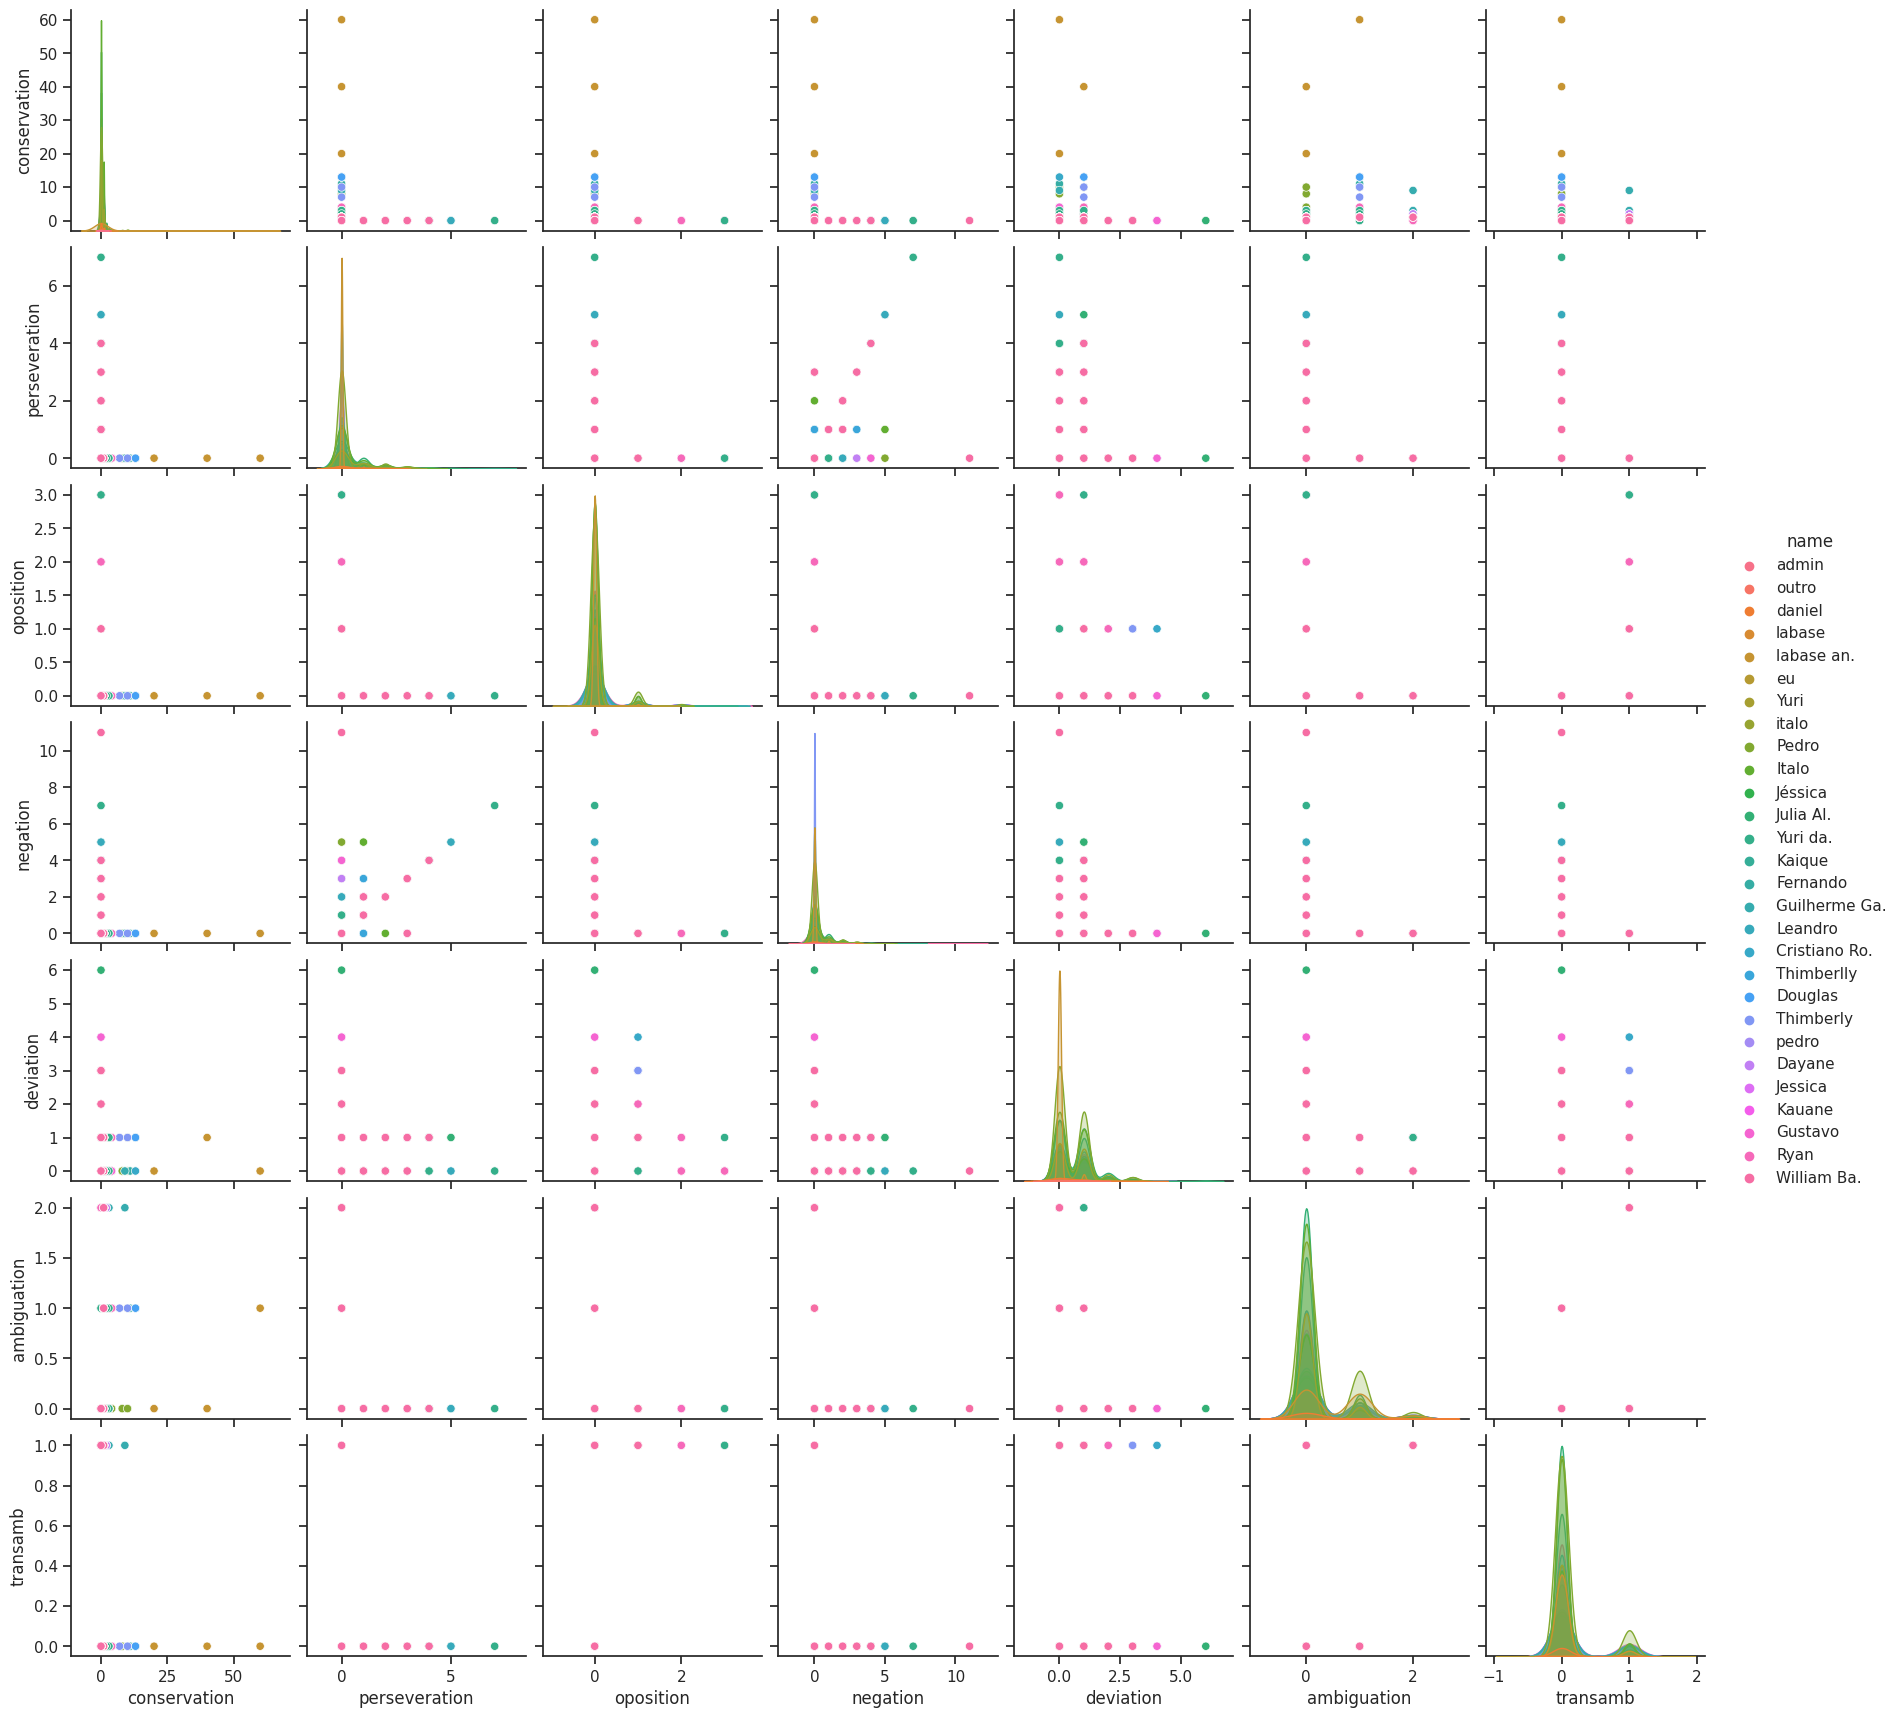

In [84]:
sns.set_theme(style="ticks")
dfp = WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info()
# df = sns.load_dataset("penguins")
sns.pairplot(dfp, hue="name")


## Factor plot

<Figure size 2000x800 with 0 Axes>

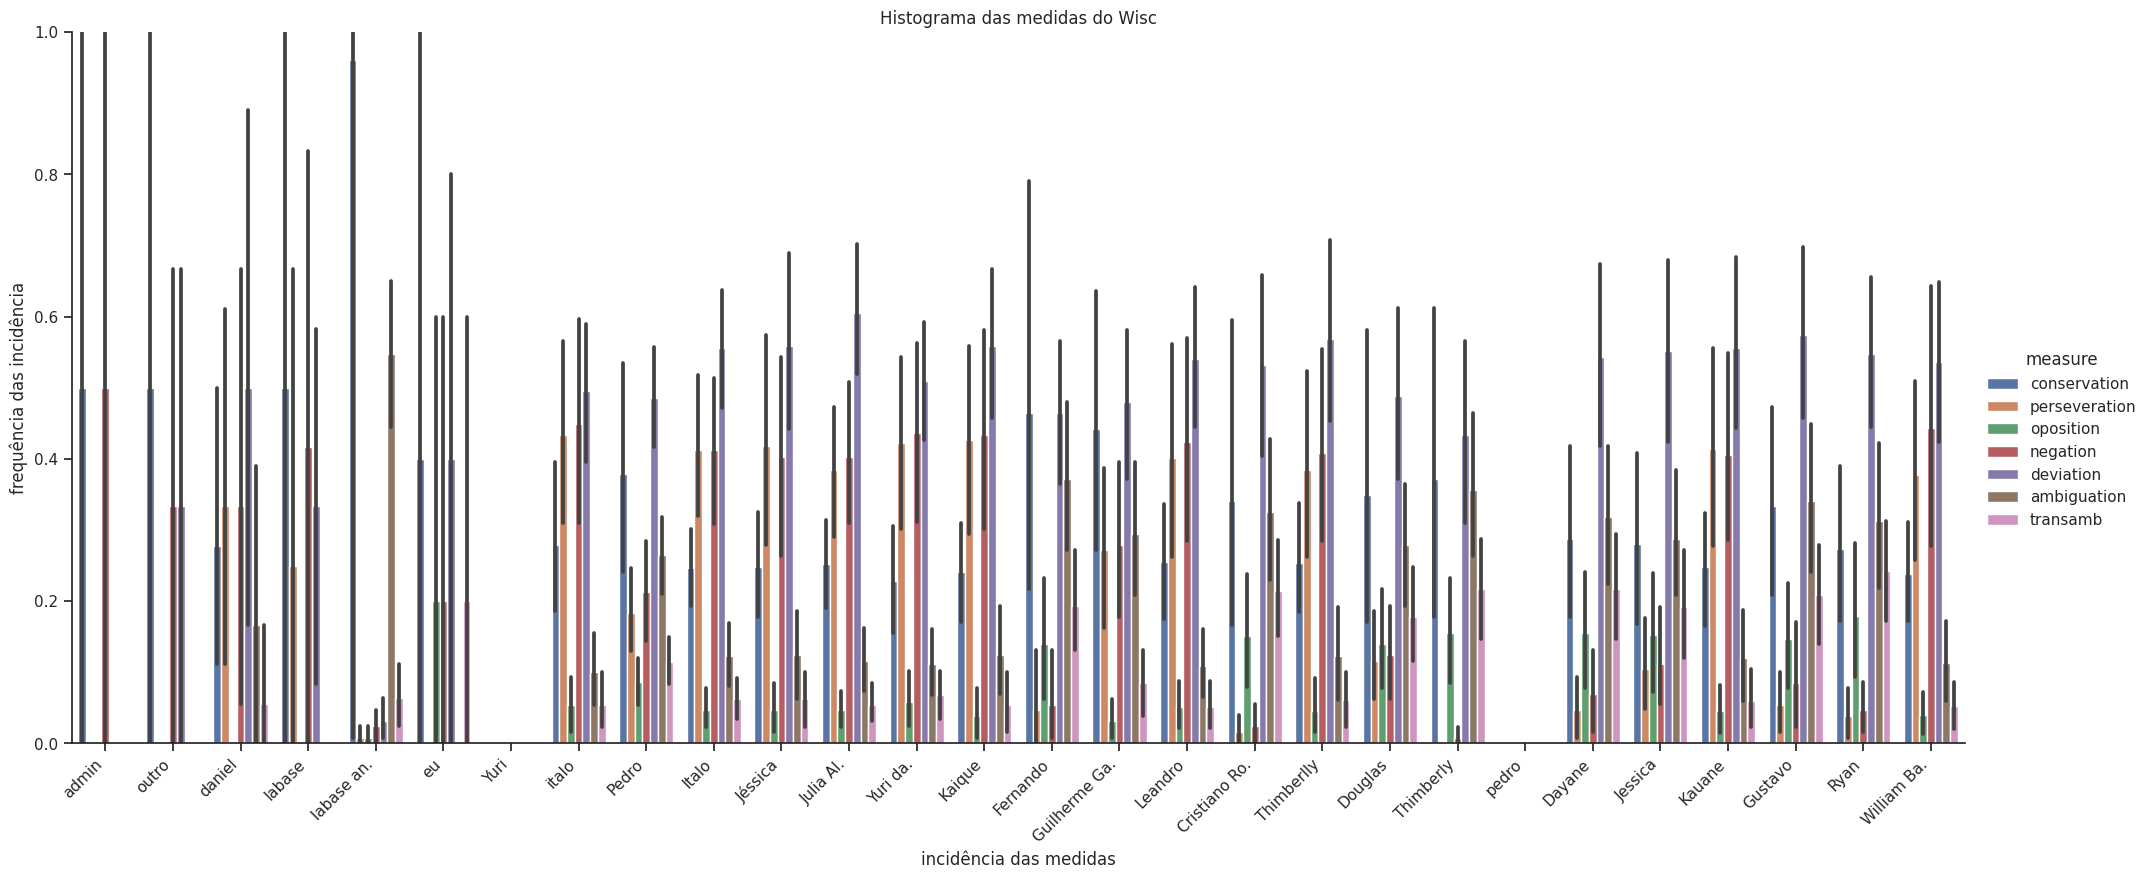

In [85]:
_ = WiscPlot().retrieve_oid_from_person_df(df_players).factorplot(conf)


### Plotagem das contagens dos valores do Wiconsin

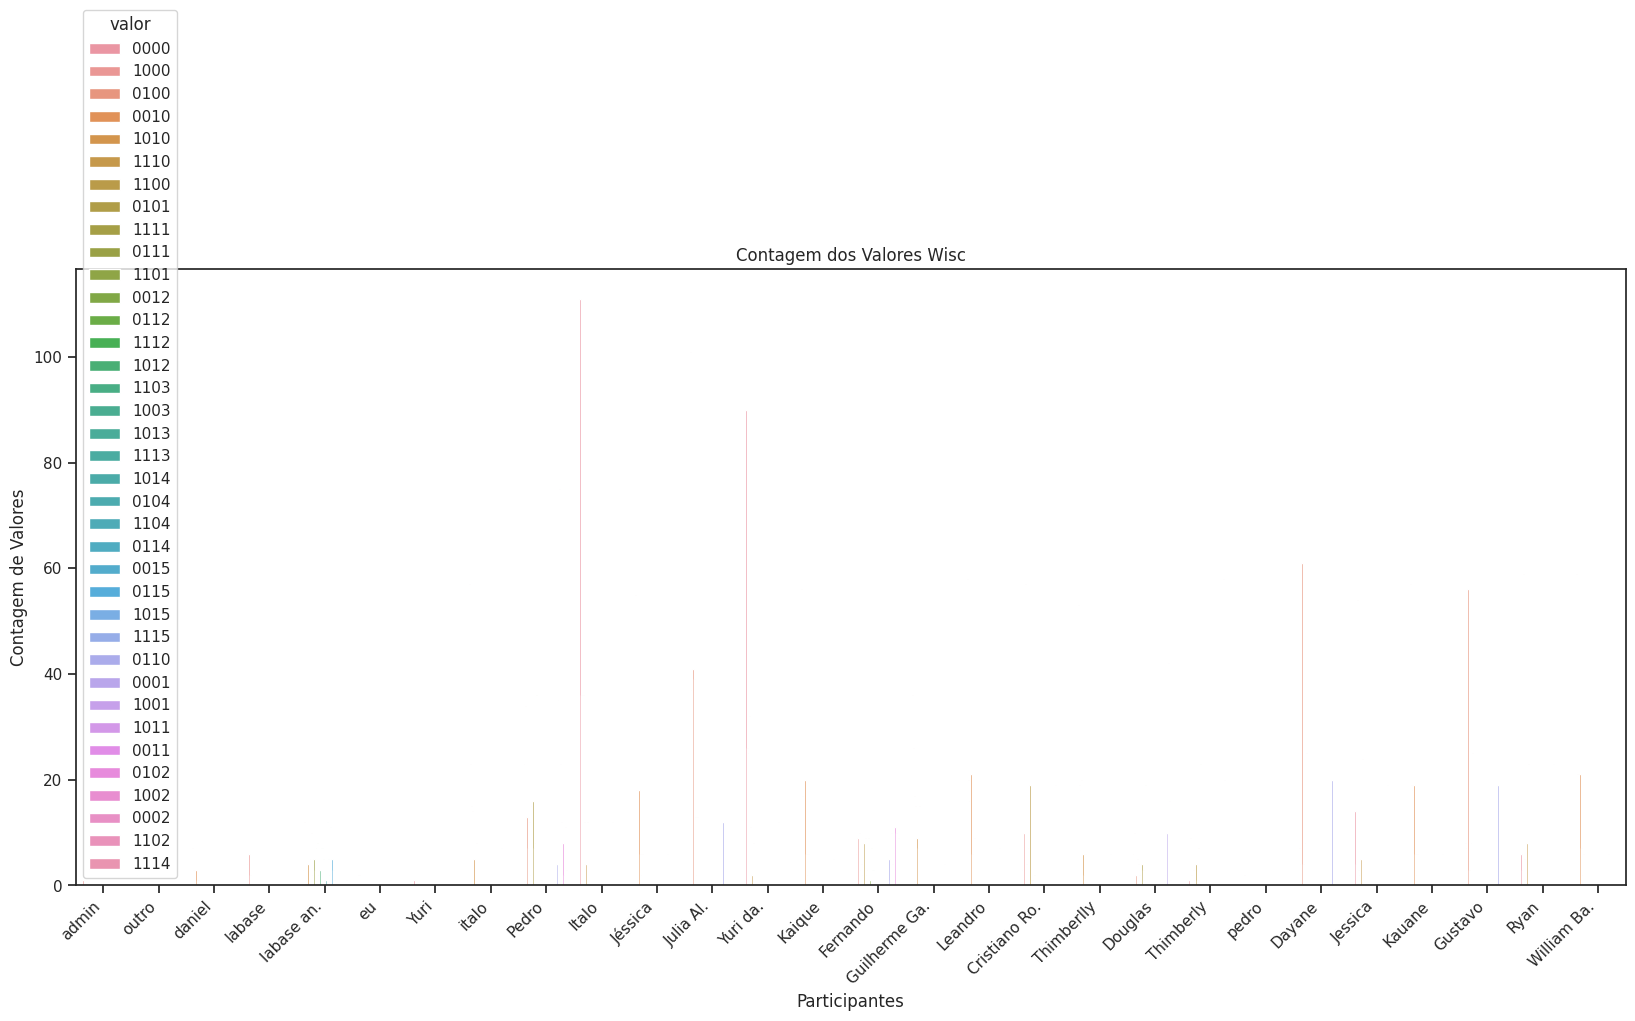

In [86]:
conf = WiscPlot.Cfplot(
     col='valor', title='Contagem dos Valores Wisc', ylabel='Contagem de Valores', xlabel="Participantes")
_ = WiscPlot().retrieve_oid_from_person_df(df_players).plot(conf)


### Plotagem das contagens dos pontos do Wiconsin

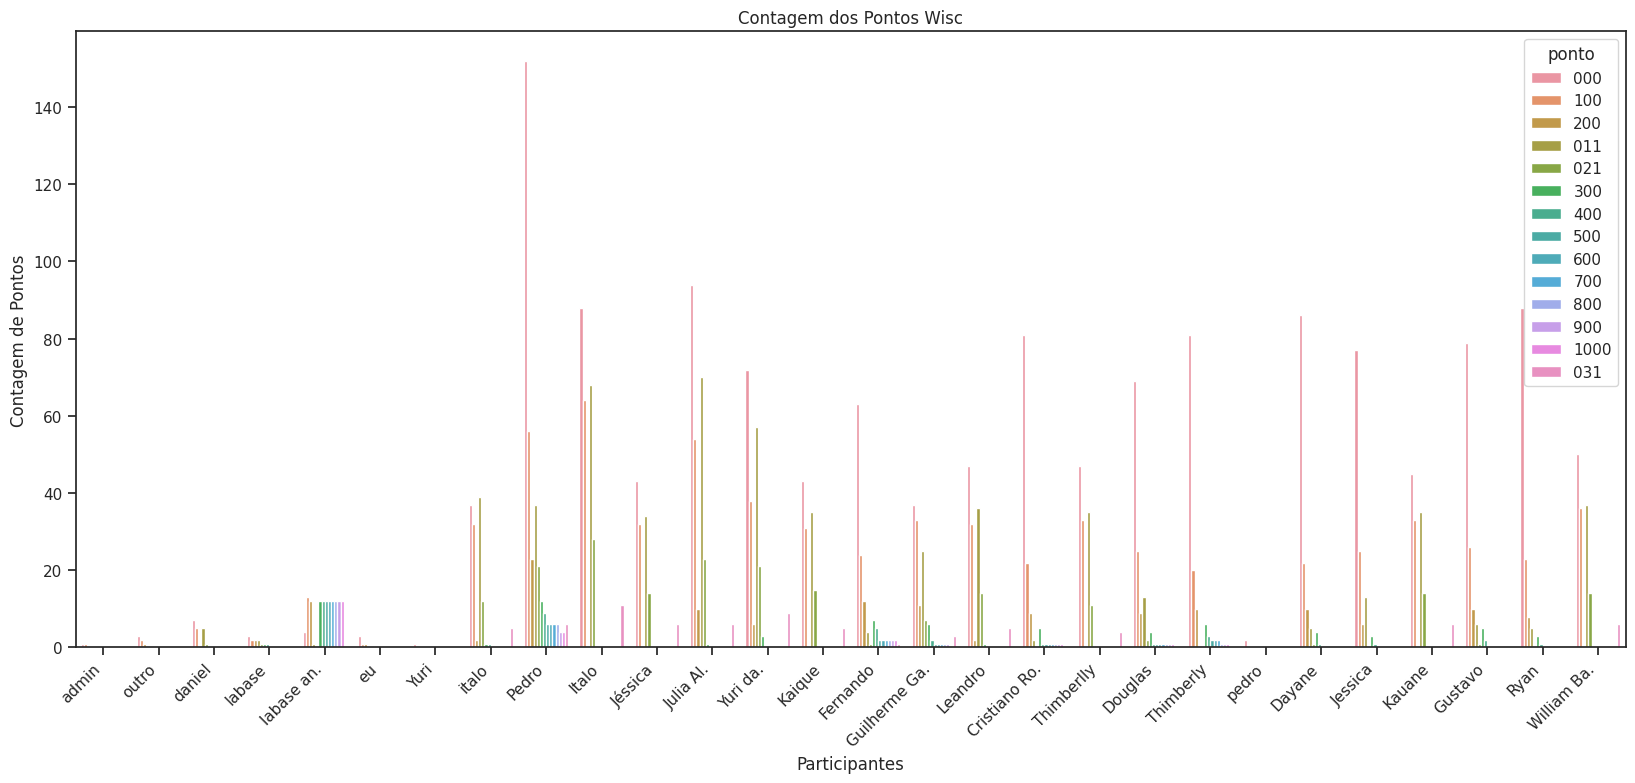

In [87]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
_ = WiscPlot().retrieve_oid_from_person_df(df_players).plot(conf)


### Gráfico dos fatores das medidas do Wiconsin

<Figure size 2000x800 with 0 Axes>

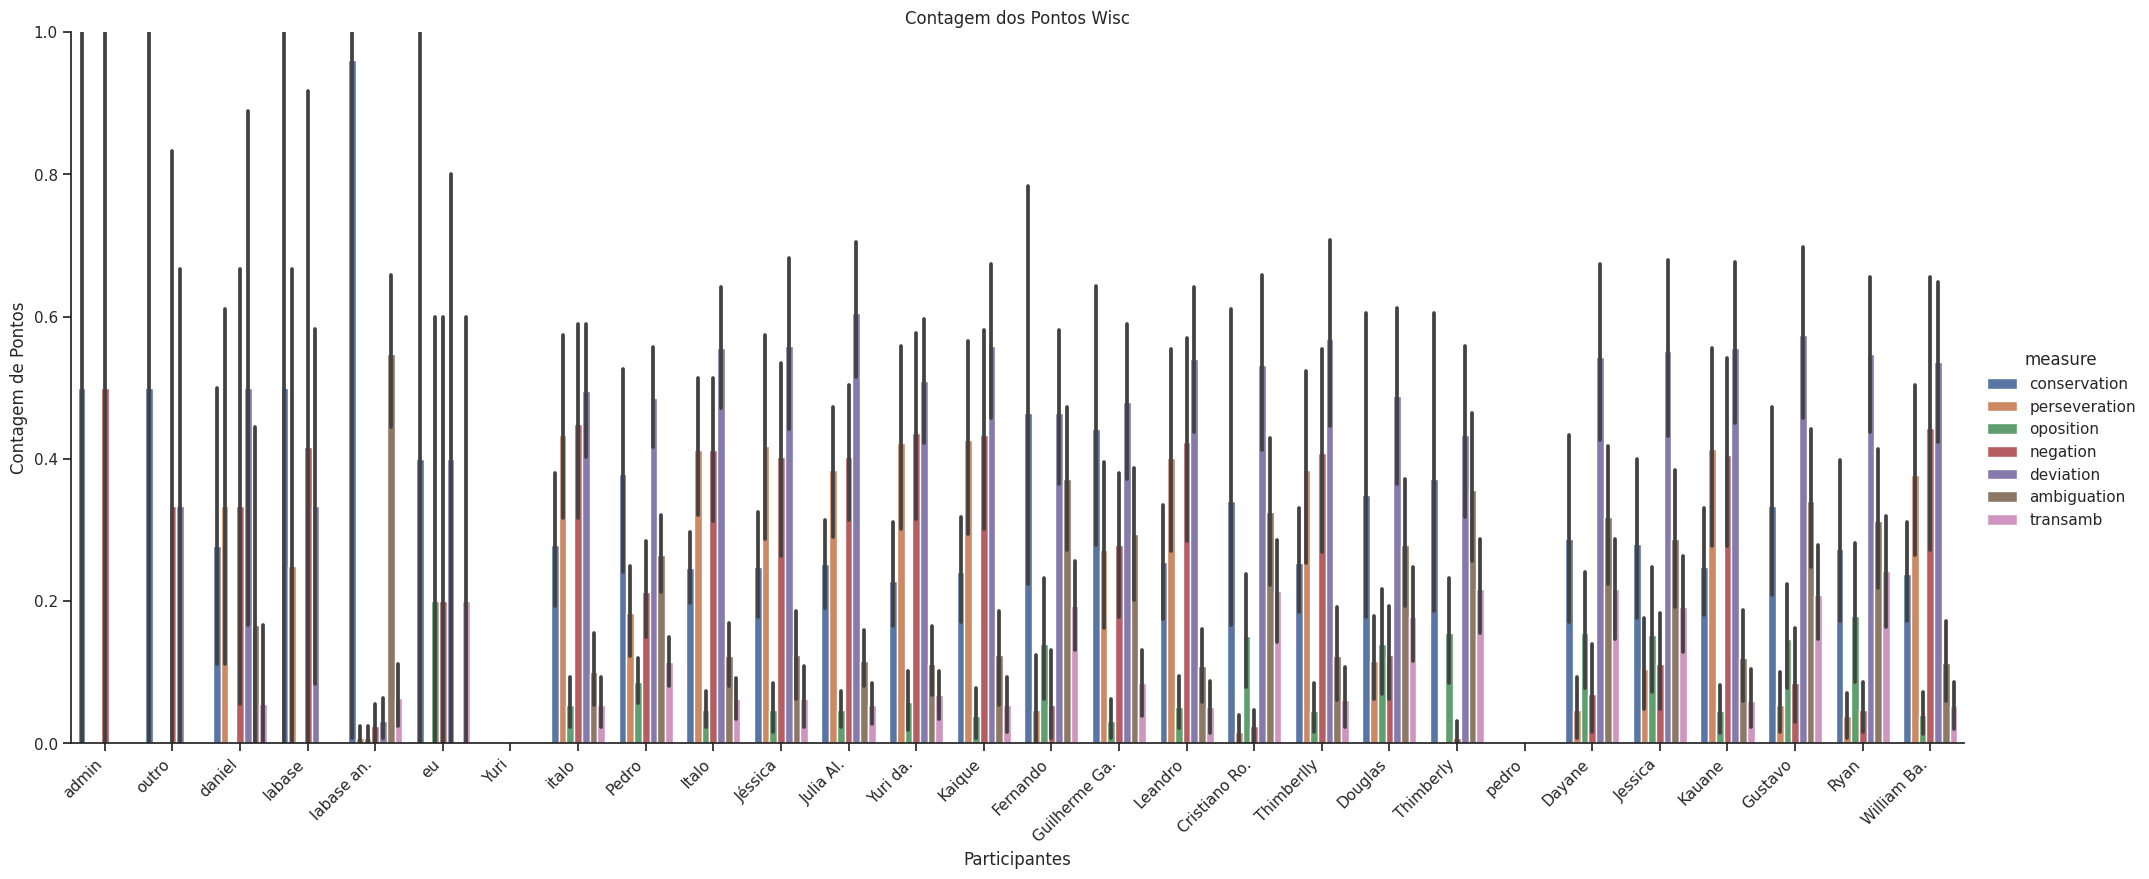

In [88]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
_ = WiscPlot().retrieve_oid_from_person_df(df_players).factorplot(conf)


### Gráfico de violino das medidas do Wiconsin

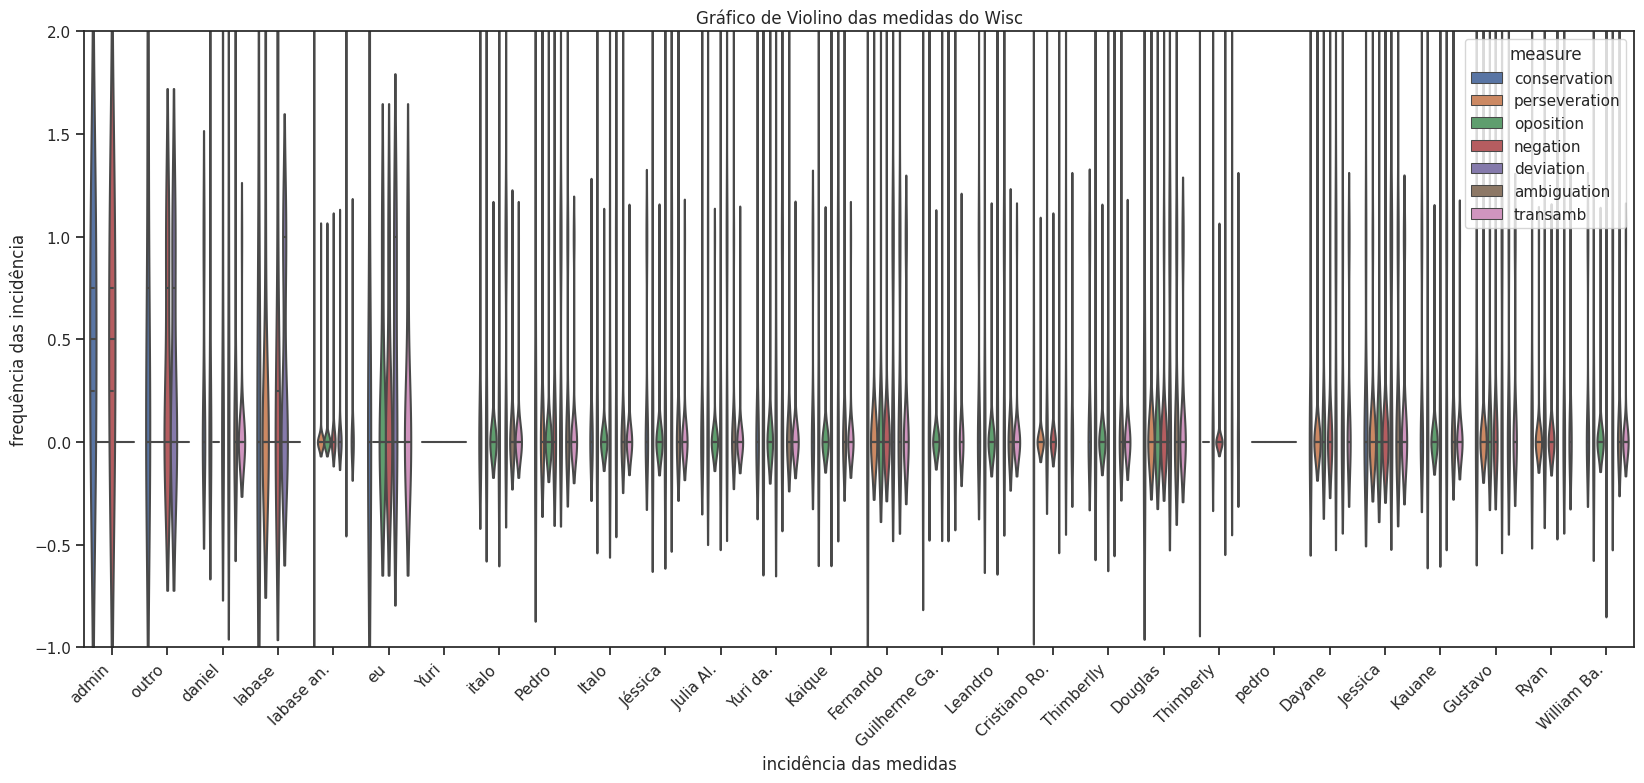

In [89]:
conf = WiscPlot.Cfplot(
    col='ponto', title='Gráfico de Violino das medidas do Wisc', ylabel='frequência das incidência',
    xlabel="incidência das medidas")
_ = WiscPlot().retrieve_oid_from_person_df(df_players).violinplot(conf)


### Histograma das medidas do Wiconsin

In [90]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência', xlabel="incidência das medidas")
_ = WiscPlot().retrieve_oid_from_person_df(df_players).histplot(conf)


<Figure size 2000x800 with 0 Axes>

### Correlação das medidas do Wiconsin

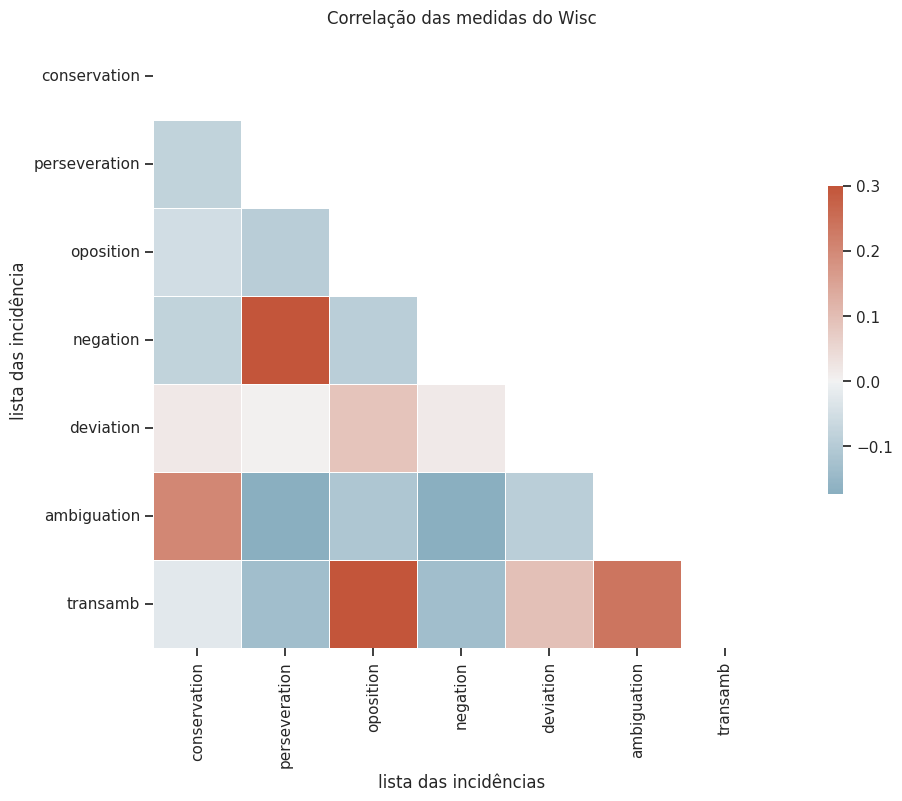

In [91]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Correlação das medidas do Wisc', ylabel='lista das incidência', xlabel="lista das incidências")
_ = WiscPlot().retrieve_oid_from_person_df(df_players).heatmap(conf)


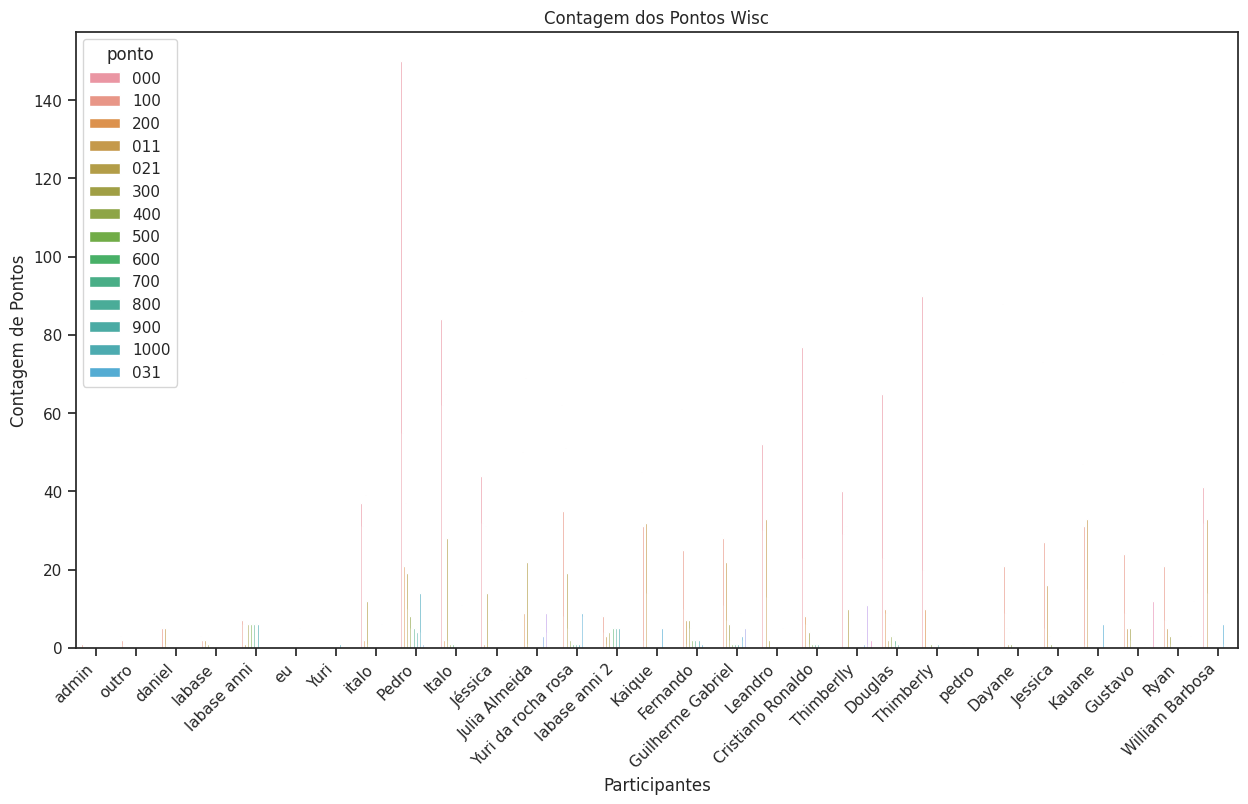

In [92]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfwc, x="name", hue="ponto")
_ = chart.set(title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Gráfico de distribuição dos pontos no Wisc

In [93]:
import seaborn as sns
from matplotlib import pyplot as plt
pd.to_numeric(dfwc.ponto)
_ = plt.figure(figsize=(15,8))
chart = sns.displot(data=dfwc, x="ponto")
_ = chart.set(title='Distribuição dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Pontuações")

ValueError: Unable to parse string "_Mundo_" at position 103

## Gráfico da distribuição dos valores no Wisc

In [101]:
import seaborn as sns
from matplotlib import pyplot as plt
pd.to_numeric(p if p.isdigit() else 0 for p in  dfwc.ponto)
_ = plt.figure(figsize=(15,8))
chart = sns.displot(data=dfwc, x="valor")
_ = chart.set(title='Distribuição dos Valores Wisc', ylabel='Contagem de Valores', xlabel="Valores")

ValueError: Buffer has wrong number of dimensions (expected 1, got 0)

## Gráfico da correlação entre pontos e valores no Wisc

/tmp/ipykernel_223653/1866397003.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwc[cols] = dfwc[cols].apply(pd.to_numeric, errors='coerce', axis=1)


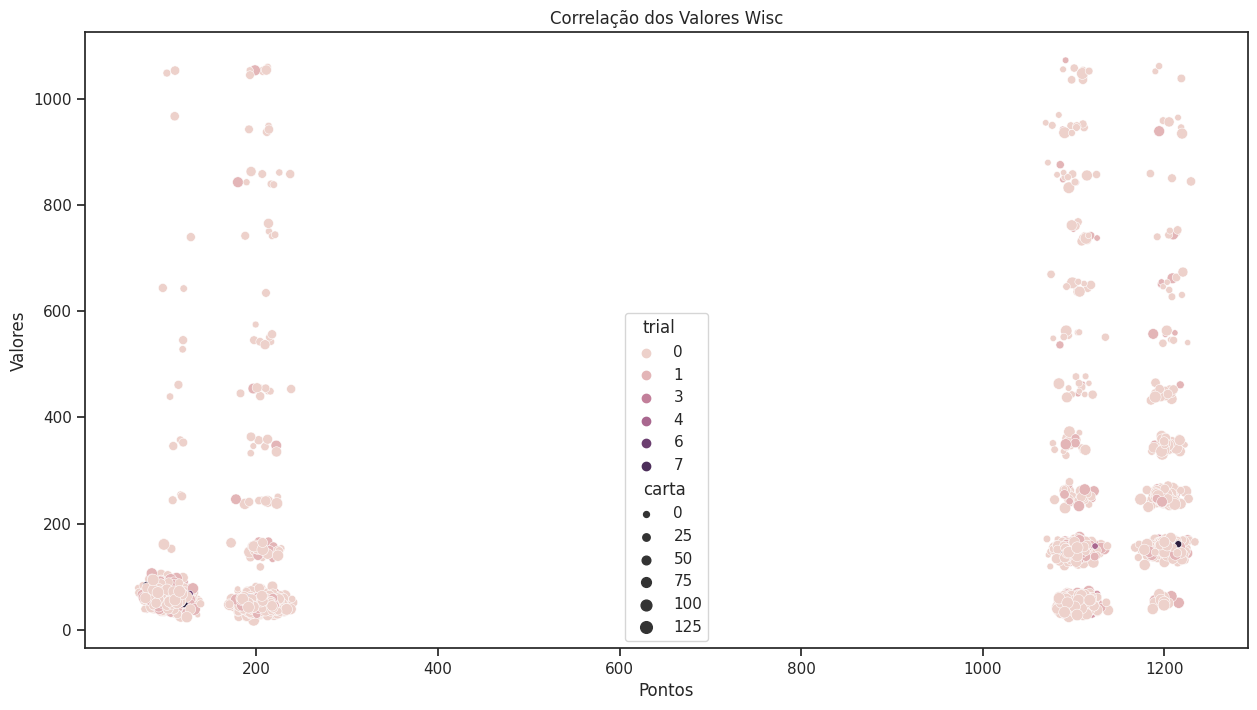

In [102]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
def jitter(values,j):
    return values + np.random.normal(j,10,values.shape)
cols = ['valor', 'ponto', 'carta']
dfwc[cols] = dfwc[cols].apply(pd.to_numeric, errors='coerce', axis=1)
# dfwc["ponto"] = pd.to_numeric(dfwc.ponto)
# pd.to_numeric(dfwc.valor)
_ = plt.figure(figsize=(15,8))
chart = sns.scatterplot(data=dfwc, x=jitter(dfwc.valor, 100), y=jitter(dfwc.ponto, 50), size="carta", hue="trial")
_ = chart.set(title='Correlação dos Valores Wisc', ylabel='Valores', xlabel="Pontos")

## Gráfico da contagem de valores do Wisc

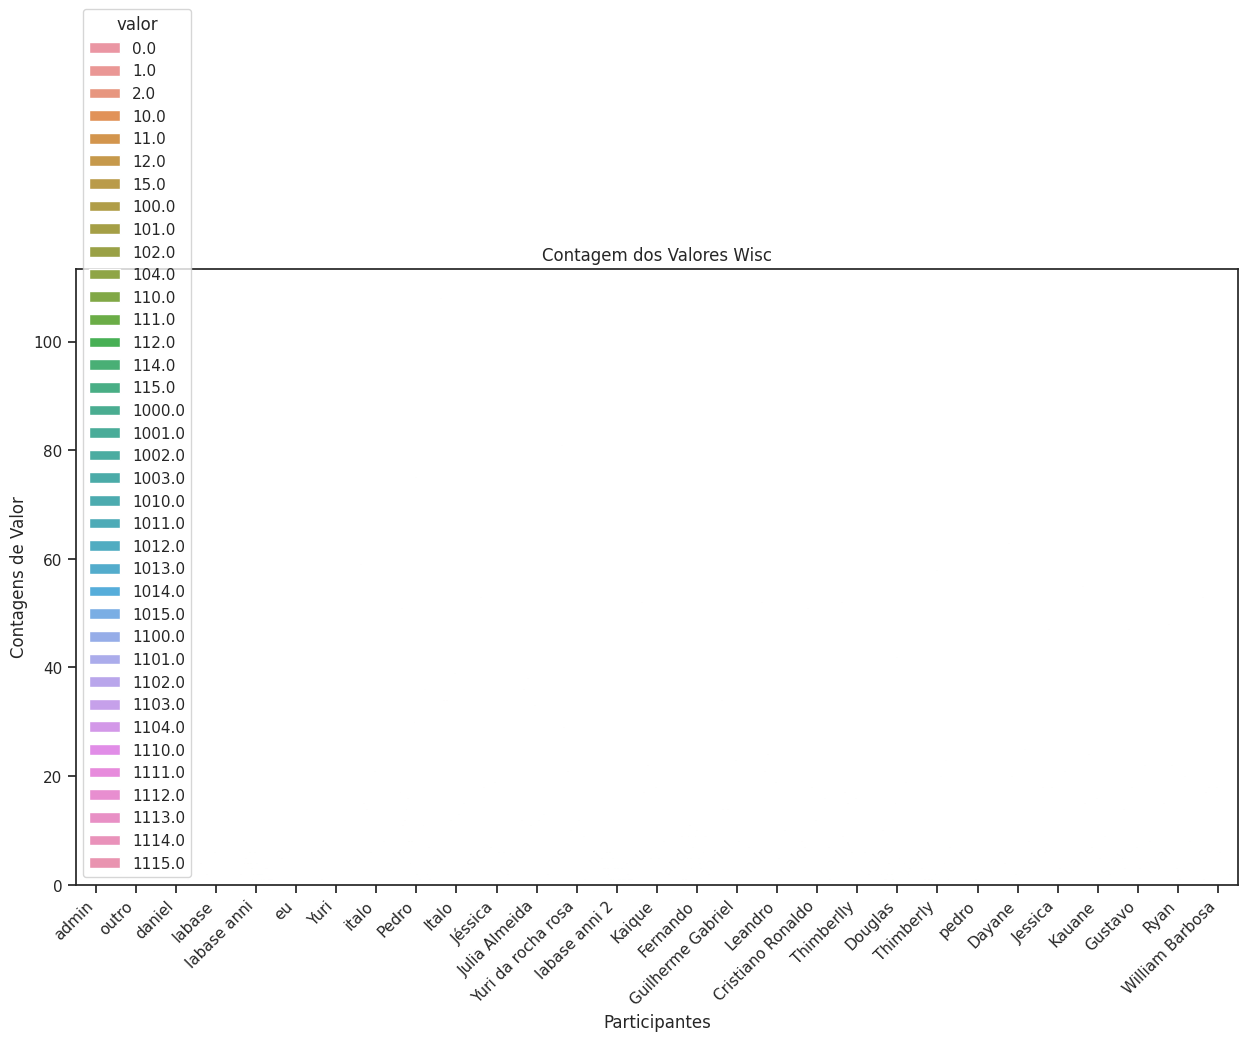

In [103]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfwc, x="name", hue="valor")
_ = chart.set(title='Contagem dos Valores Wisc', ylabel='Contagens de Valor', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Limpeza dos nomes dos valores de carta e ponto no EICA

In [104]:
dfei = dfa_.loc[dfa_['game'] == 'game']
dfei['carta'] = [re.findall(r"__(.+?)__",text)[0] if type(text) == str and text.startswith('_') else text for text in dfei.carta.to_list()]
dfei['ponto'] = [re.findall(r"_(.+?)_",text)[0] if type(text) == str and text.startswith('_') else text for text in dfei.ponto.to_list()]

dfei

/tmp/ipykernel_223653/4251974003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfei['carta'] = [re.findall(r"__(.+?)__",text)[0] if type(text) == str and text.startswith('_') else text for text in dfei.carta.to_list()]
/tmp/ipykernel_223653/4251974003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfei['ponto'] = [re.findall(r"_(.+?)_",text)[0] if type(text) == str and text.startswith('_') else text for text in dfei.ponto.to_list()]


index                                   _id             name  game  \
2          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
3          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
4          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
5          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
6          1  ObjectId('6477ce20f626d3cb95e08c8f')            admin  game   
...      ...                                   ...              ...   ...   
10755    124  ObjectId('64a7896fb23753d1d92bcbe7')  William Barbosa  game   
10756    125  ObjectId('64a7896fb23753d1d92bcbe7')  William Barbosa  game   
10757    126  ObjectId('64a78b02b23753d1d92bcbef')  William Barbosa  game   
10758    127  ObjectId('64a78b02b23753d1d92bcbef')  William Barbosa  game   
10910    138  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa  game   

       goal  trial      carta                   casa                     move  \
2         0      0    I_N_I_T                    0_0                       ok   
3         0      0  A_T_I_V_A                    0_0                       ok   
4         0      0   minitens                400_520                       ok   
5         0      0          6                420_160                       ok   
6         0      0  A_T_I_V_A                    0_0                       ok   
...     ...    ...        ...                    ...                      ...   
10755     0      5         13  Quatro Círculos Azuis        Duas Cruzes Azuis   
10756     0      6          0               no no no                 no no no   
10757     0      0          1  Quatro Círculos Azuis       Um Triângulo Verde   
10758     0      1          2  Quatro Círculos Azuis  Quatro Cruzes Vermelhas   
10910     0      0        NaN                    NaN                      NaN   

        ponto     valor                        time  
2        INIT      True  2023-05-31 19:49:01.943000  
3      CHAVES      True  2023-05-31 19:49:08.206000  
4        ABAS  minitens  2023-05-31 19:49:11.043999  
5      Chaves      True  2023-05-31 19:49:13.635999  
6      CHAVES     False  2023-05-31 19:49:16.654000  
...       ...       ...                         ...  
10755     100      1000  2023-07-07 00:50:42.440000  
10756     000      0000  2023-07-07 00:51:39.427000  
10757     011      0000  2023-07-07 00:51:45.402000  
10758     000      0010  2023-07-07 00:51:47.443000  
10910     NaN       NaN                         NaN  

[7577 rows x 12 columns]

## Gráfico de contagem de pontos EICA

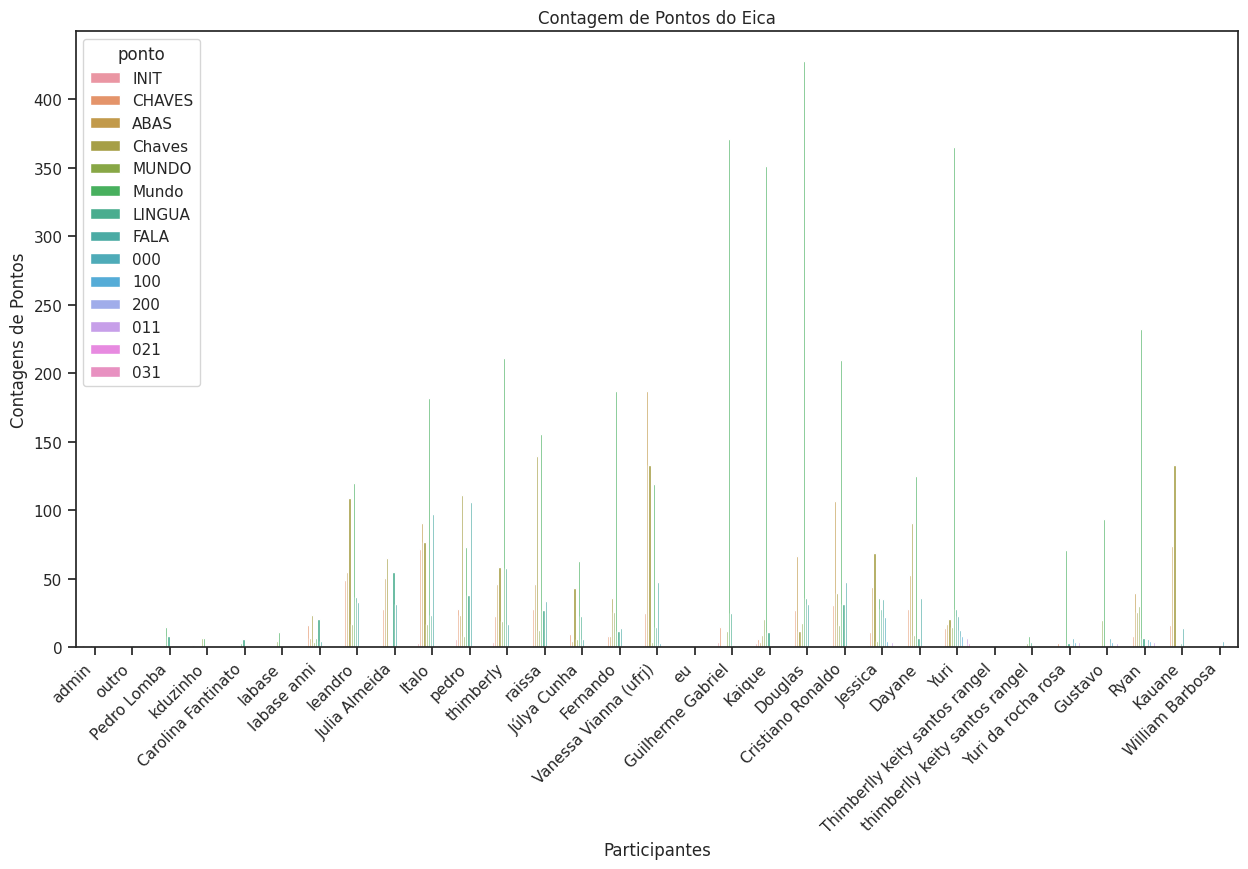

In [105]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfei, x="name", hue="ponto")
_ = chart.set(title='Contagem de Pontos do Eica', ylabel='Contagens de Pontos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Gráfico de contagem de cartas do EICA

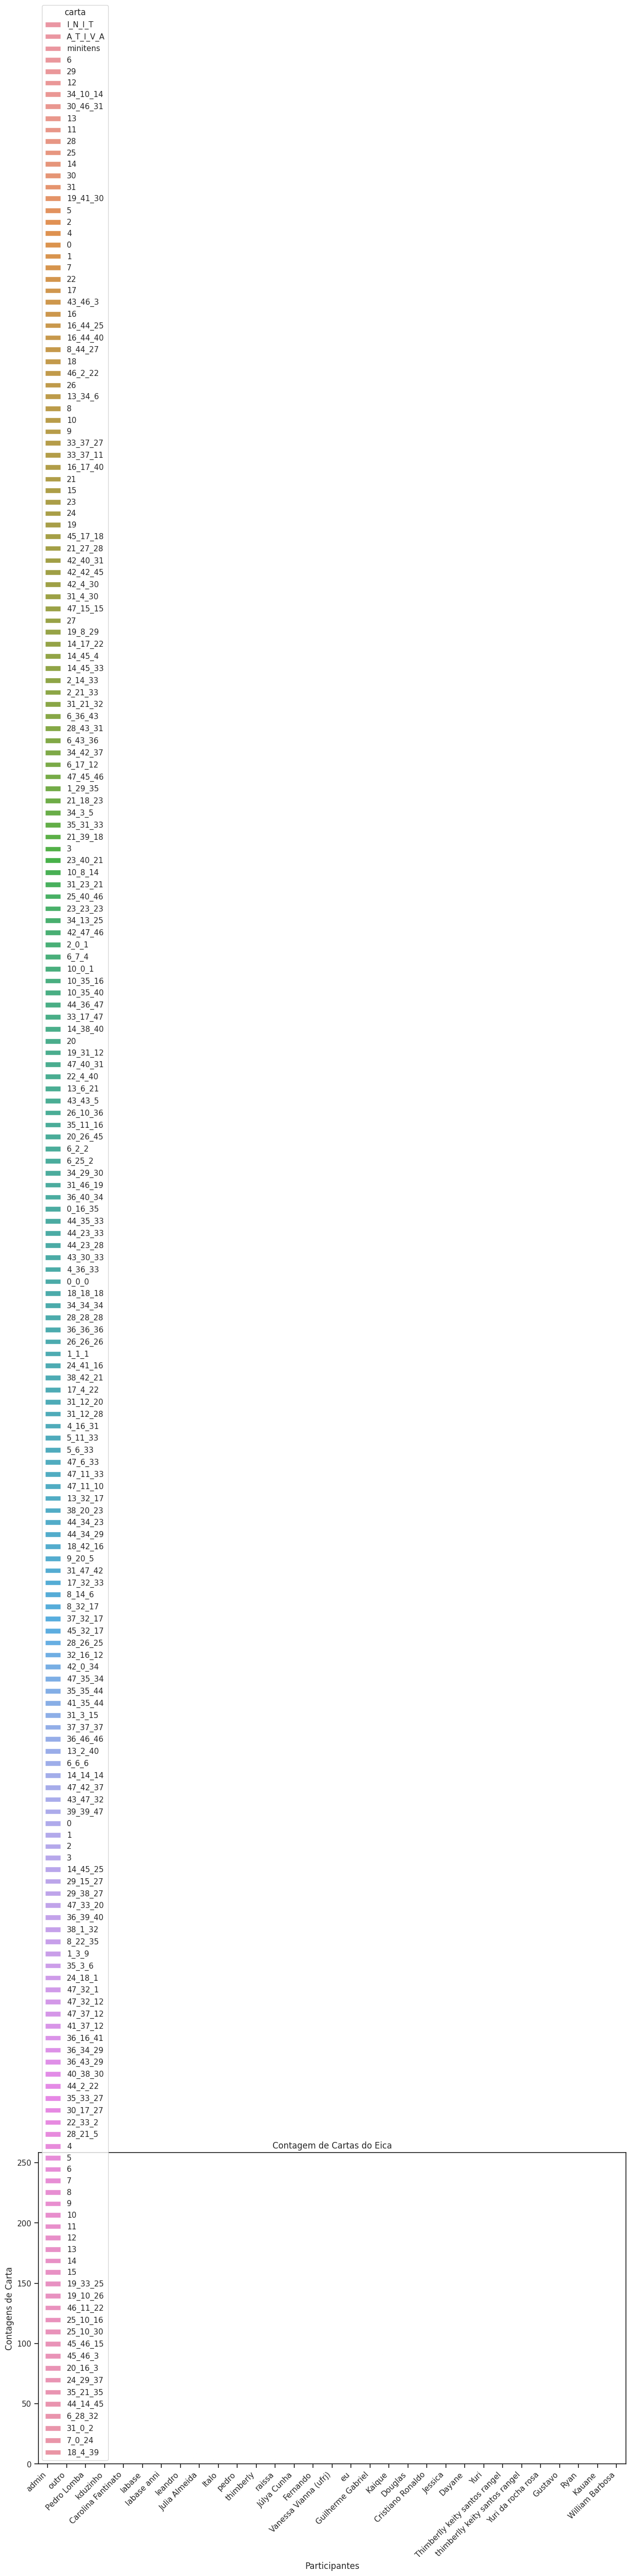

In [106]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfei, x="name", hue="carta")
_ = chart.set(title='Contagem de Cartas do Eica', ylabel='Contagens de Carta', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')